In [43]:
from tools import HopfieldNetwork
import numpy as np
import matplotlib.pyplot as plt

# 3.5 Capacity

## 3.5.1 Capacity Stress Testing

### How many patterns could safely be stored? Was the drop in performance gradual or abrupt?

Abrupt 100% drop in performance once p4 was added.

In [44]:
distorted_pixels = 100

for i in range(1, 10): 
    hn = HopfieldNetwork(1024)
    pattern_indices = [x for x in range(1, i+1)]
    hn.fit(pattern_indices=pattern_indices)

    distorted_memories = hn.distort_patterns(
        num_units=distorted_pixels,
        pattern_indices=pattern_indices
    )

    patterns_pred = hn.recall(inputs=distorted_memories)
    results = hn.evaluate(
        patterns_pred=patterns_pred,
        pattern_indices=pattern_indices
    )
    print(results)


[True]
[True, True]
[True, True, True]
[False, False, False, False]
[False, False, False, False, False]
[False, False, False, False, False, False]
[False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False]
[False, False, False, False, False, False, False, False, False]


### Try to repeat this with learning a few random patterns instead of the pictures and see if you can store more.

The Hopfield network is able to store more random patterns.

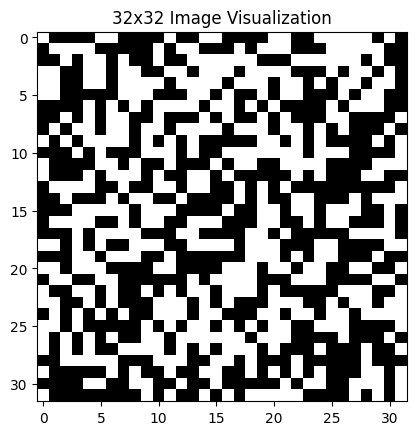

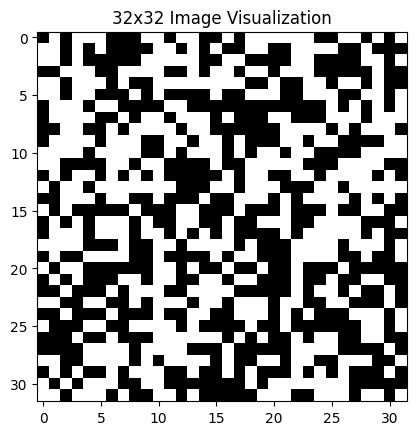

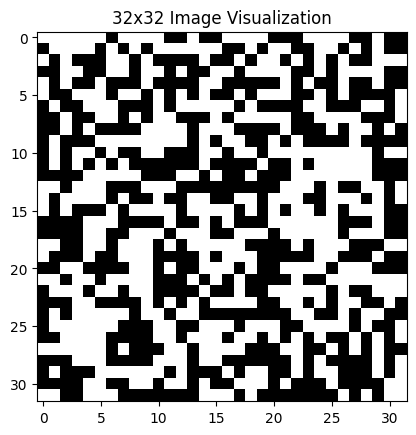

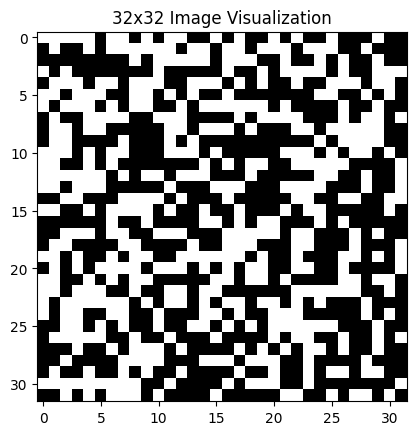

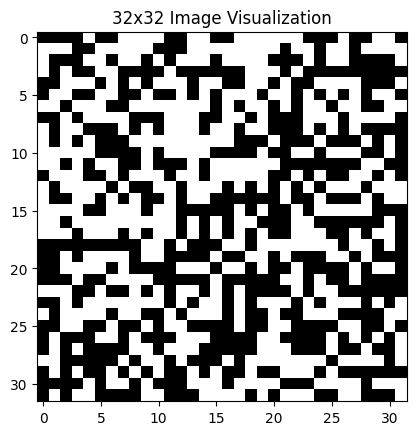

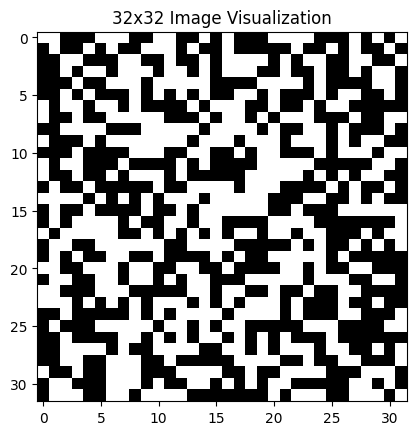

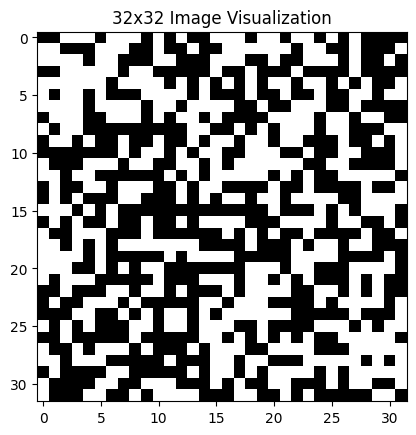

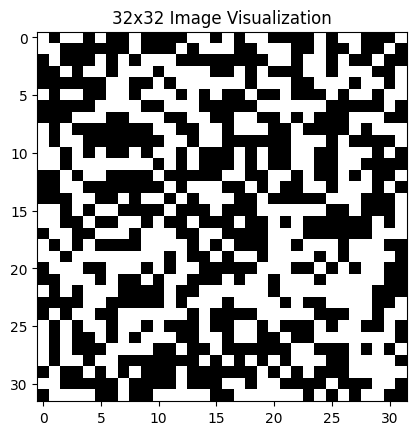

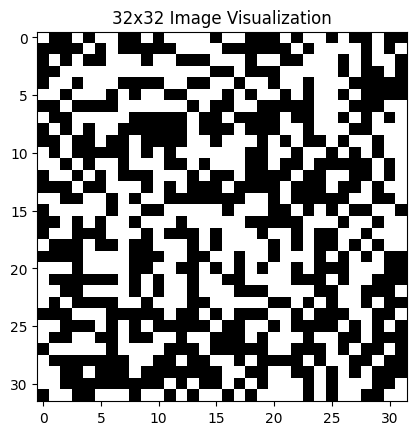

In [59]:
from tools import generate_random_patterns

random_patterns = generate_random_patterns(num_patterns=9)
for i in range(9):
    HopfieldNetwork(1024).visualizex_pattern(random_patterns[i], save_path=f"imgs//3.5.1_random_{i+1}.png")

In [46]:
distorted_pixels = 100

for i in range(1, 10): 
    hn = HopfieldNetwork(1024)
    pattern_indices = [x for x in range(1, i+1)]
    random_patterns = generate_random_patterns(i)

    hn.fit(patterns=random_patterns)

    distorted_memories = hn.distort_patterns(
        num_units=distorted_pixels,
        patterns=random_patterns
    )

    random_patterns_pred = hn.recall(inputs=distorted_memories)
    results = hn.evaluate(
        patterns_pred=random_patterns_pred,
        patterns=random_patterns
    )
    print(results)


[True]
[True, True]
[True, True, True]
[True, True, True, True]
[True, True, True, True, True]
[True, True, True, True, True, True]
[True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True]
[True, True, True, True, True, True, True, True, True]


### It has been shown that the capacity of a Hopfield network is around 0.138N. How do you explain the difference between random patterns and the pictures?

The Hopfield network is able to store more random patterns because random patterns are less correlated, whereas pictures tend to have more correlated features.

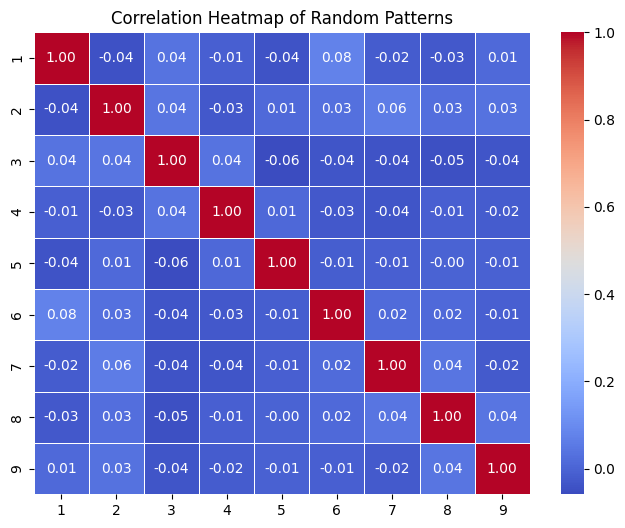

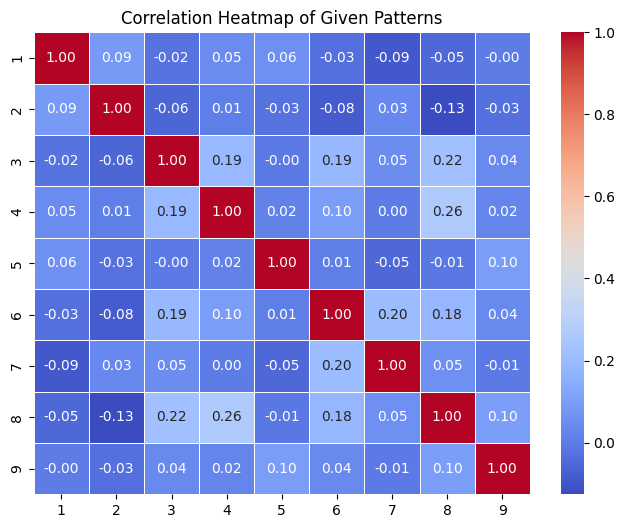

In [47]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

random_patterns_correlation = pd.DataFrame(random_patterns.T).corr()
patterns_correlation = pd.DataFrame(hn._load_pattern(None, [x for x in range(1,10)]).T).corr()

plt.figure(figsize=(8, 6))
sns.heatmap(random_patterns_correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", xticklabels=range(1, 10), yticklabels=range(1, 10))
plt.title('Correlation Heatmap of Random Patterns')
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(patterns_correlation, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", xticklabels=range(1, 10), yticklabels=range(1, 10))
plt.title('Correlation Heatmap of Given Patterns')
plt.show()

## 3.5.2 Stability Testing

In [83]:
xlim = (0, 300)
ylim = (0, 35)

### What happens with the number of stable patterns as more are learned?

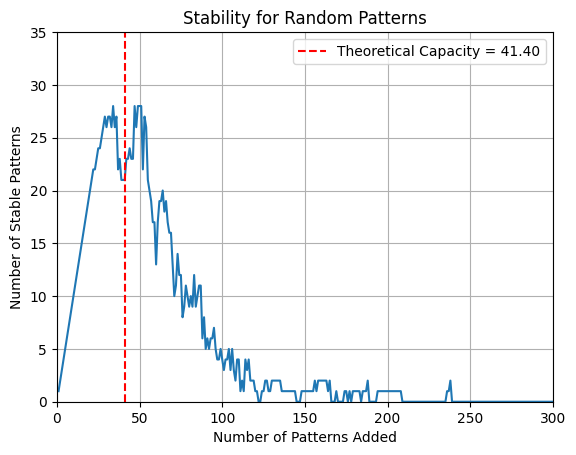

In [85]:
num_patterns=300
network_size=300
random_patterns = generate_random_patterns(num_patterns=num_patterns, pattern_size=network_size)
hn = HopfieldNetwork(n_nodes=network_size)
stable_counts = hn.fit_incremental(random_patterns)
capacity = 0.138 * network_size

plt.plot(range(1, num_patterns + 1), stable_counts)
plt.axvline(x=capacity, color='red', linestyle='--', label=f'Theoretical Capacity = {capacity:.2f}')

plt.xlabel("Number of Patterns Added")
plt.ylabel("Number of Stable Patterns")
plt.title("Stability for Random Patterns")
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid(True)
plt.legend()

plt.show()

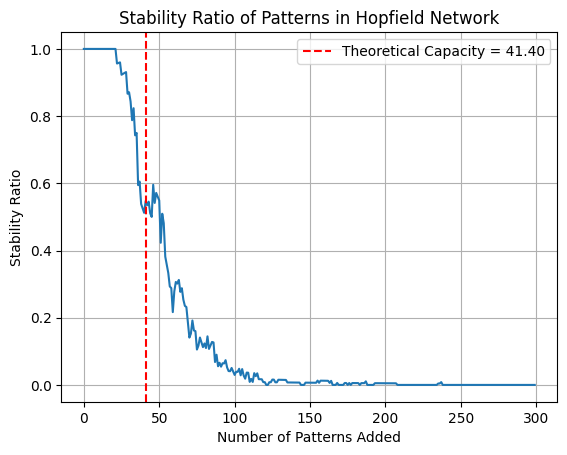

In [63]:
def divide_lists_elementwise(list1, list2):
    result = [a / b for a, b in zip(list1, list2)]
    return result

ratio = divide_lists_elementwise(stable_counts, range(1, num_patterns + 1))

plt.plot(ratio)
plt.axvline(x=capacity, color='red', linestyle='--', label=f'Theoretical Capacity = {capacity:.2f}')

plt.xlabel("Number of Patterns Added")
plt.ylabel("Stability Ratio")
plt.title("Stability Ratio of Patterns in Hopfield Network")
plt.grid(True)
plt.legend()
plt.show()

In [57]:
# window_size = 50
# smoothed_counts = np.convolve(stable_counts, np.ones(window_size)/window_size, mode='valid')

# plt.plot(range(1, len(smoothed_counts) + 1), smoothed_counts, color='darkorange')
# plt.xlabel("Number of Patterns Added")
# plt.ylabel("Smoothed Number of Stable Patterns")
# plt.title("Smoothed Stability of Patterns in Hopfield Network")
# plt.show()

### What happens if convergence to the pattern from a noisy version (a few flipped units) is used? What does the different behavior for large number of patterns mean?

With a small number of stored patterns: The network should be able to recover the original pattern from a noisy version because Hopfield networks act as associative memories. As more patterns are stored: The network’s recall ability deteriorates. This means: Some noisy inputs may converge to the wrong pattern. Some may get stuck in spurious (incorrect but stable) states. Some may fail to converge at all (oscillations or chaotic behavior). For a large number of stored patterns (~0.15N or more): The network loses its ability to reliably recover original patterns from noise, leading to a significant drop in retrieval accuracy.

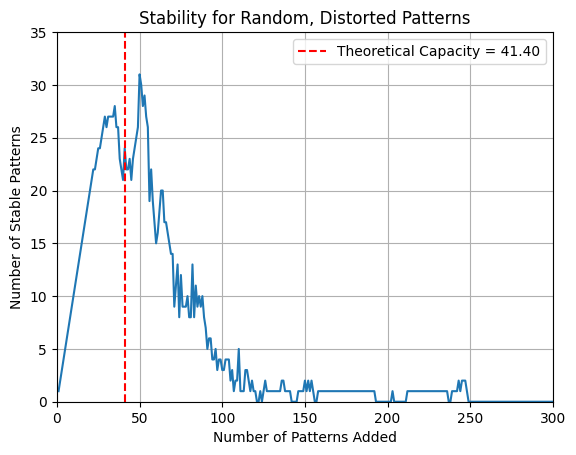

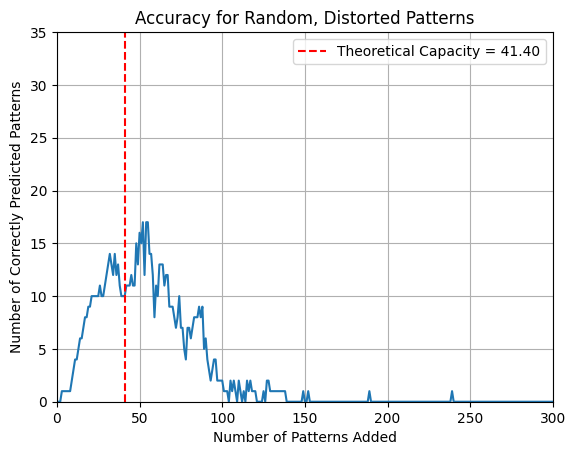

In [86]:
num_patterns=300
network_size=300
distorted_pixels=3
random_patterns = generate_random_patterns(num_patterns=num_patterns, pattern_size=network_size)
distorted_random_patterns = HopfieldNetwork(n_nodes=network_size).distort_patterns(
    num_units=distorted_pixels, patterns=random_patterns
)
stable_counts = hn.fit_incremental(distorted_random_patterns)
capacity = 0.138 * network_size

plt.plot(range(1, num_patterns + 1), stable_counts)
plt.axvline(x=capacity, color='red', linestyle='--', label=f'Theoretical Capacity = {capacity:.2f}')

plt.xlabel("Number of Patterns Added")
plt.ylabel("Number of Stable Patterns")
plt.title("Stability for Random, Distorted Patterns")
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid(True)
plt.legend()

plt.show()

# ACCURACY
correct_preds = []
for i in range(num_patterns):
    hn = HopfieldNetwork(n_nodes=network_size)
    hn.fit(patterns=random_patterns[:i])
    preds = hn.recall(distorted_random_patterns[:i])
    correct_preds.append(
        sum(
            hn.evaluate(patterns_pred=preds, patterns=distorted_random_patterns[:i])
        )
    )

plt.plot(range(1, num_patterns+1), correct_preds)
plt.axvline(x=0.138*network_size, color='red', linestyle='--', label=f'Theoretical Capacity = {capacity:.2f}')

plt.xlabel("Number of Patterns Added")
plt.ylabel("Number of Correctly Predicted Patterns")
plt.title("Accuracy for Random, Distorted Patterns")
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid(True)
plt.legend()

plt.show()

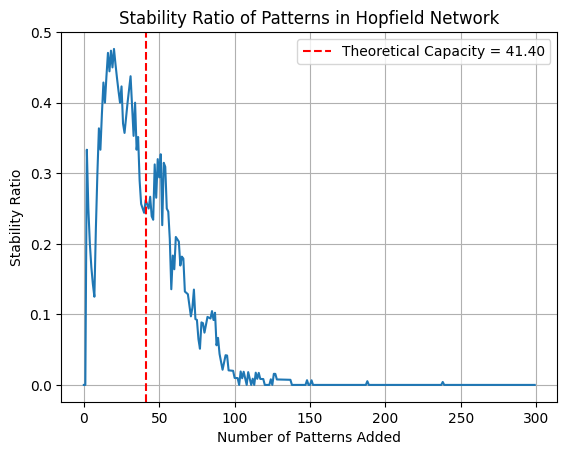

In [69]:
ratio = divide_lists_elementwise(correct_preds, range(1, num_patterns + 1))

plt.plot(ratio)
plt.axvline(x=capacity, color='red', linestyle='--', label=f'Theoretical Capacity = {capacity:.2f}')

plt.xlabel("Number of Patterns Added")
plt.ylabel("Stability Ratio")
plt.title("Stability Ratio of Patterns in Hopfield Network")
plt.grid(True)
plt.legend()
plt.show()

## 3.5.3 Removing Self-Connections

### What is the maximum number of retrievable patterns for this network?

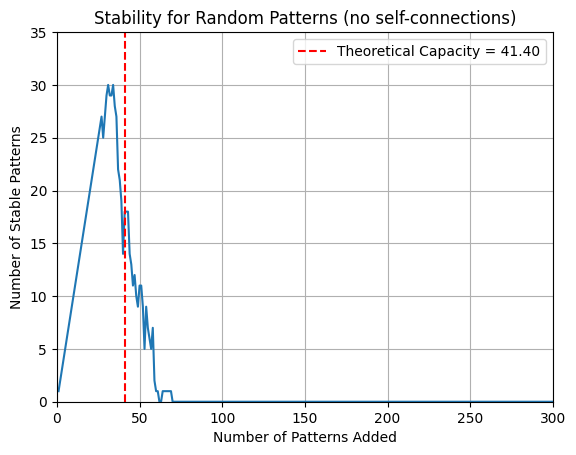

In [84]:
num_patterns=300
network_size=300
random_patterns = generate_random_patterns(
    num_patterns=num_patterns, pattern_size=network_size, seed=47
)
hn = HopfieldNetwork(n_nodes=num_patterns, remove_self_connections=True)
stable_counts = hn.fit_incremental(random_patterns)

plt.plot(range(1, num_patterns+1), stable_counts)
plt.axvline(x=0.138*network_size, color='red', linestyle='--', label=f'Theoretical Capacity = {capacity:.2f}')

plt.xlabel("Number of Patterns Added")
plt.ylabel("Number of Stable Patterns")
plt.title("Stability for Random Patterns (no self-connections)")
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid(True)
plt.legend()

plt.show()

###  What happens if you bias the patterns, e.g. use sign(0.5+randn(300,100)) or something similar to make them contain more +1? How does this relate to the capacity results of the picture patterns?

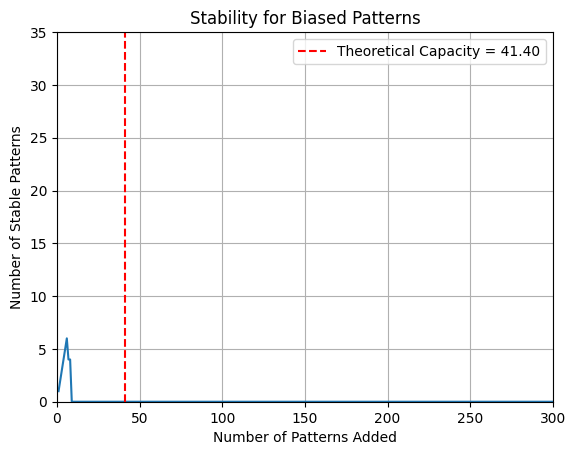

In [87]:
from tools import generate_biased_patterns

num_patterns=300
network_size=300
biased_patterns = generate_biased_patterns(num_patterns=num_patterns, patterns_size=network_size)
hn = HopfieldNetwork(n_nodes=network_size)
stable_counts = hn.fit_incremental(biased_patterns)
capacity = 0.138 * network_size

plt.plot(range(1, num_patterns + 1), stable_counts)
plt.axvline(x=capacity, color='red', linestyle='--', label=f'Theoretical Capacity = {capacity:.2f}')

plt.xlabel("Number of Patterns Added")
plt.ylabel("Number of Stable Patterns")
plt.title("Stability for Biased Patterns")
plt.xlim(xlim)
plt.ylim(ylim)
plt.grid(True)
plt.legend()

plt.show()

# 3.6 Sparse Patterns

### Try generating sparse patterns with just 10% activity and see how many can be stored for different values of θ (use a script to check different values of the bias).

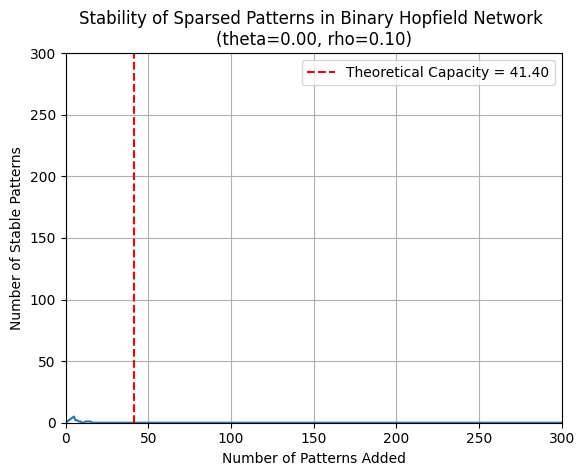

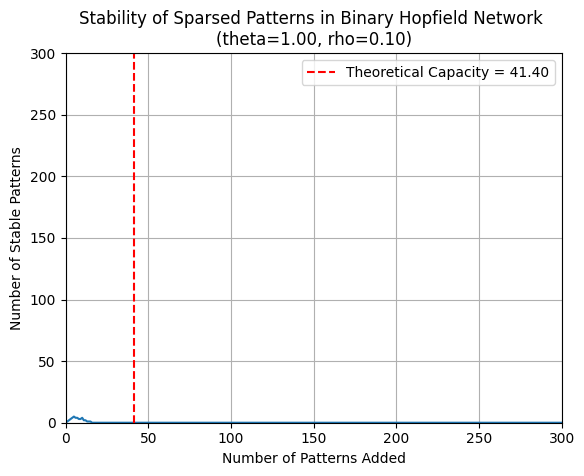

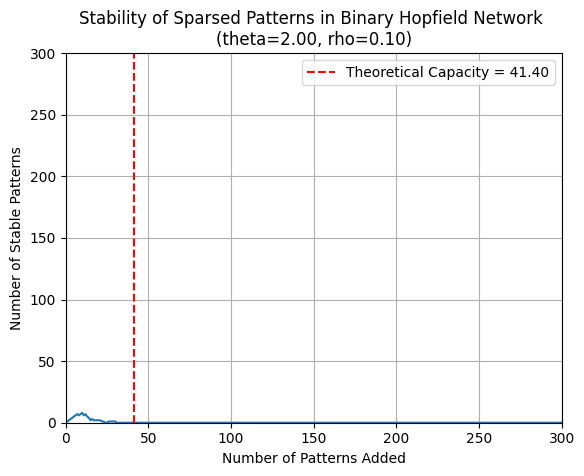

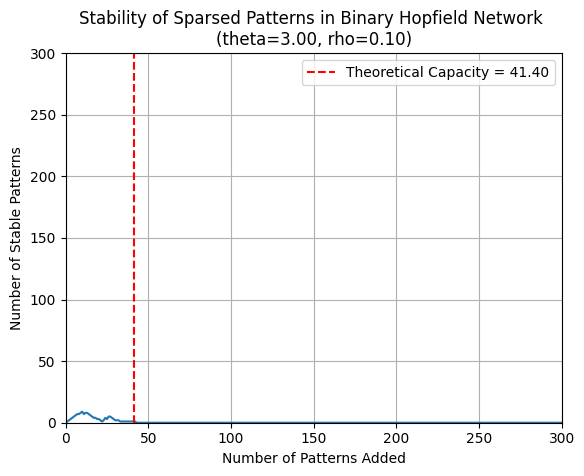

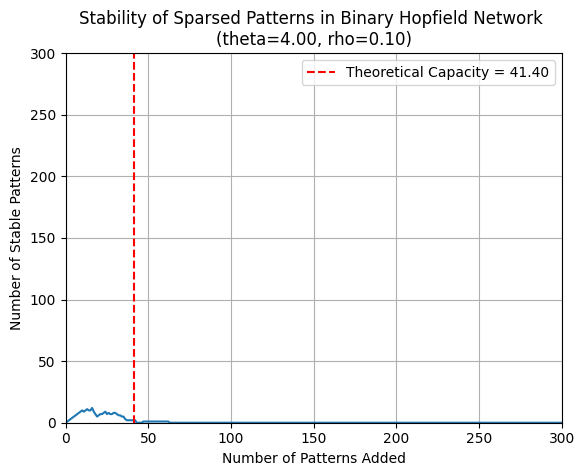

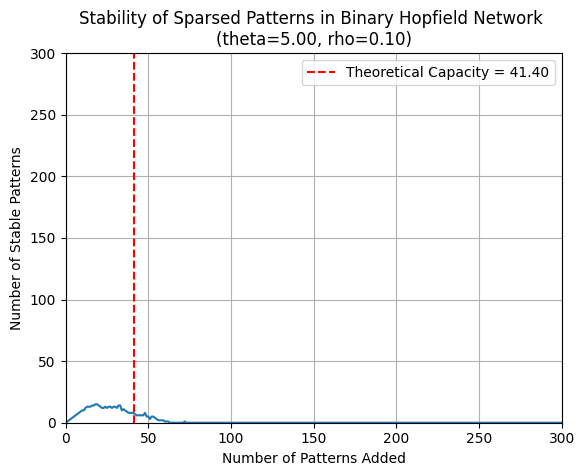

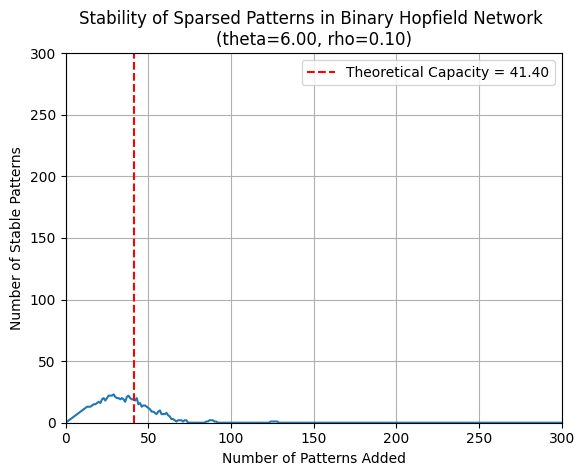

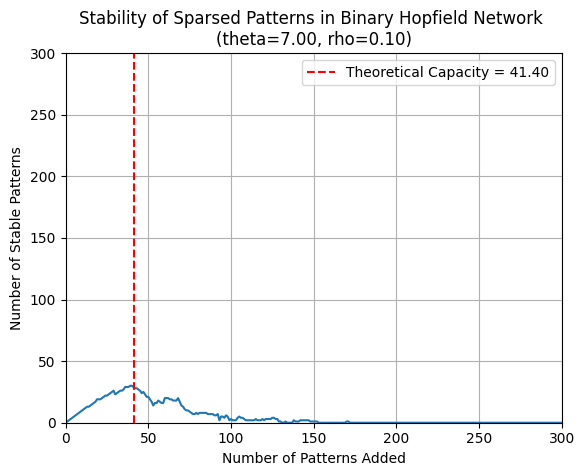

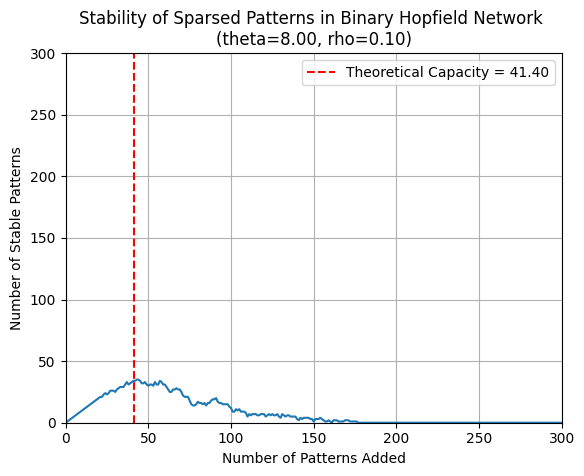

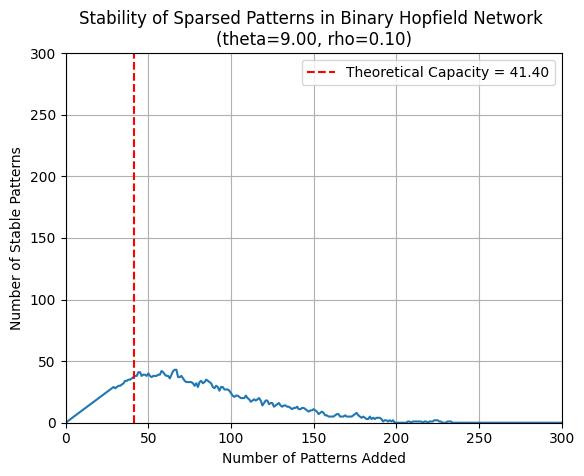

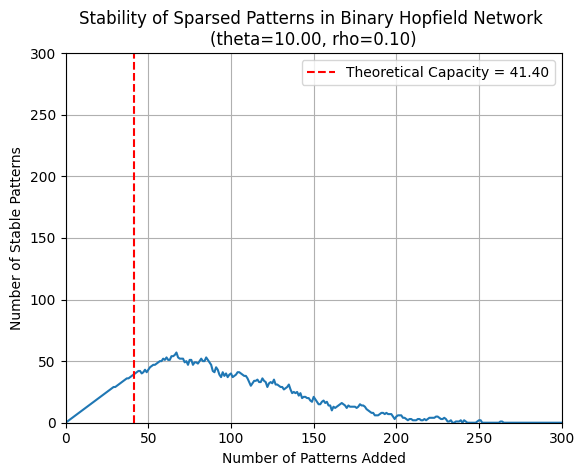

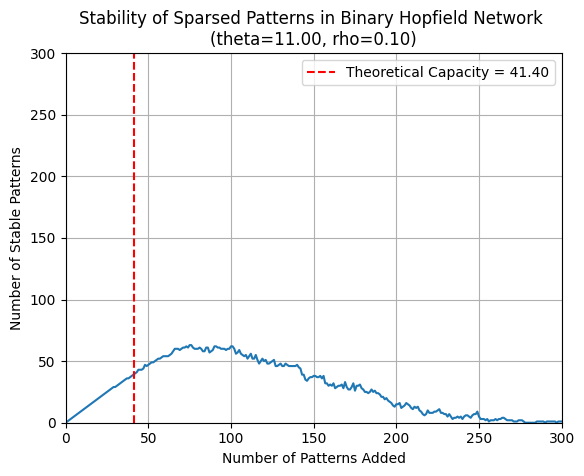

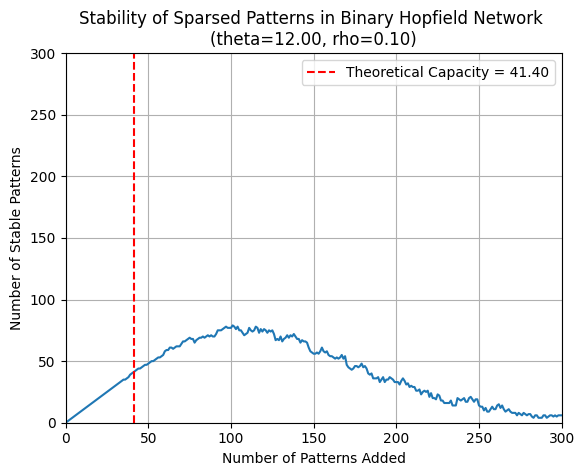

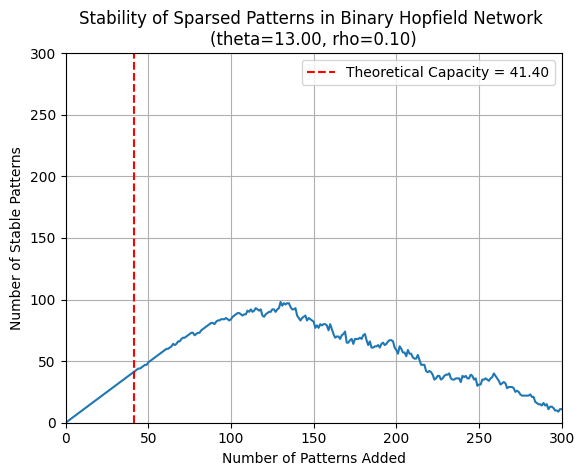

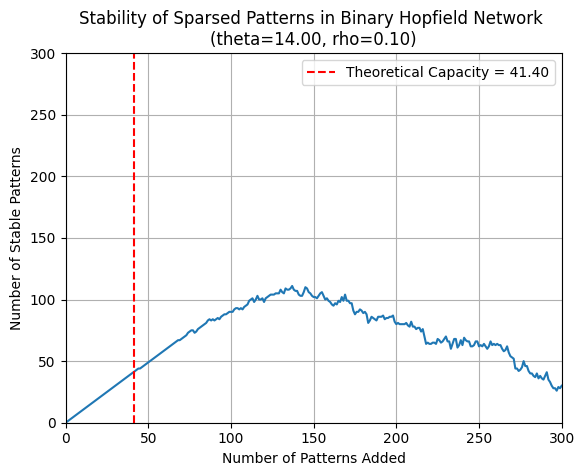

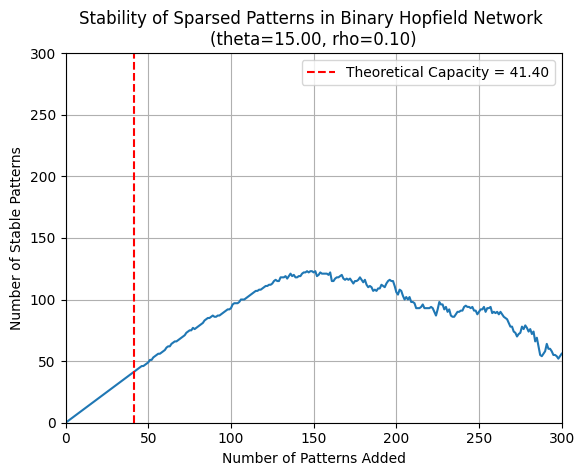

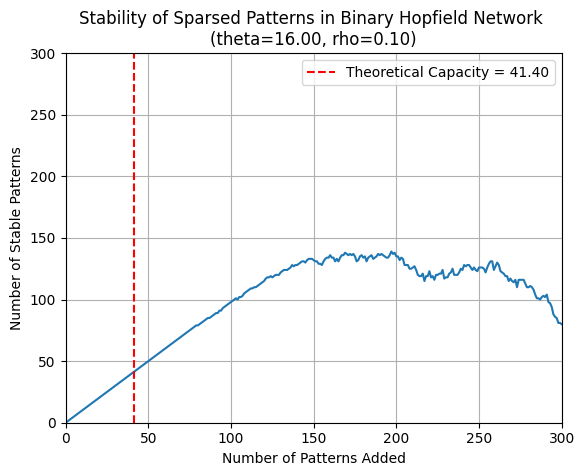

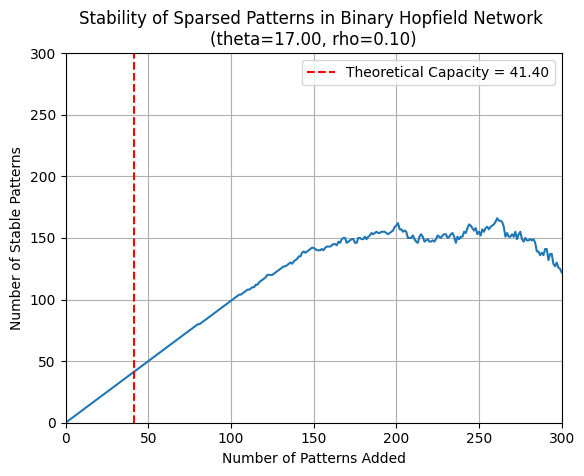

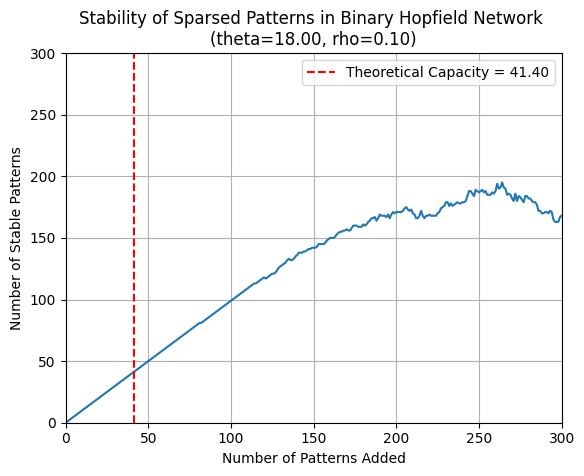

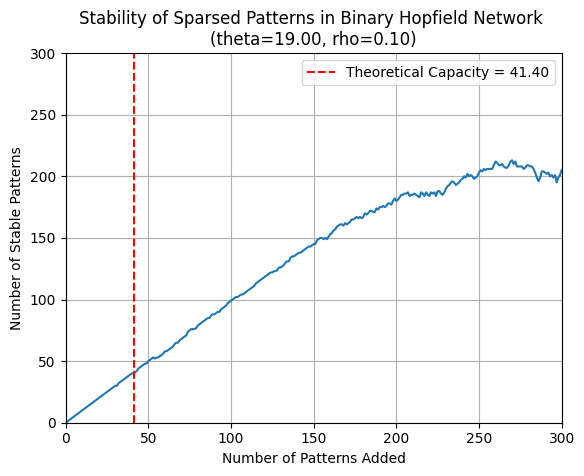

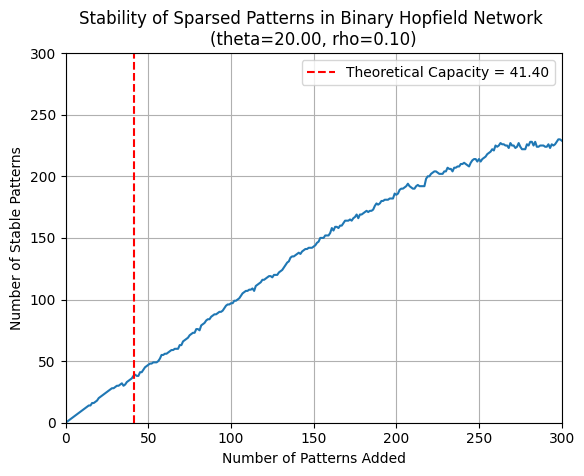

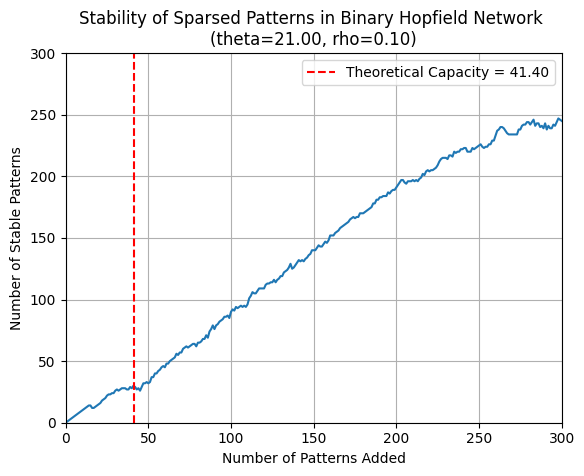

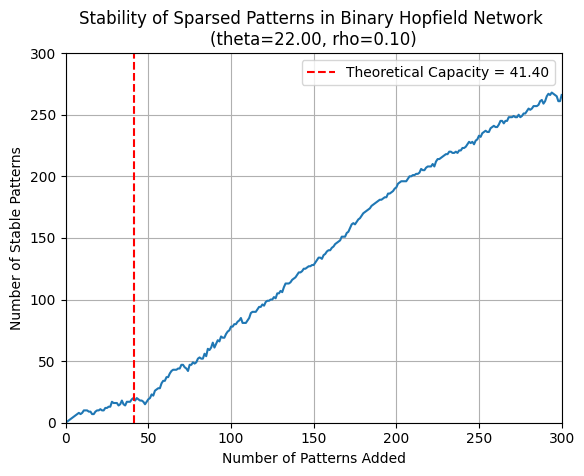

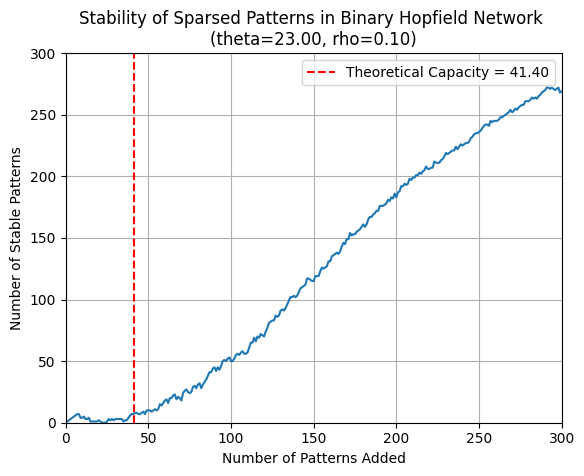

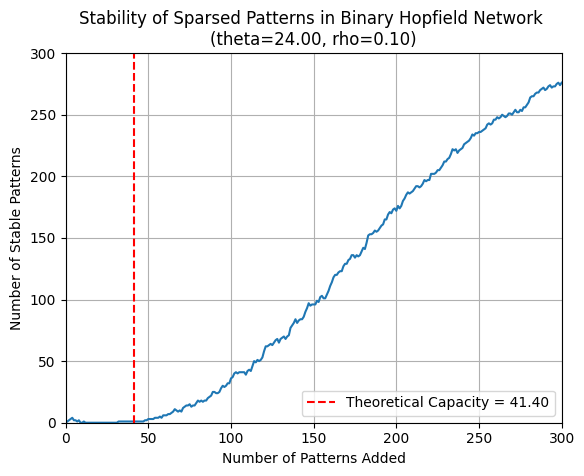

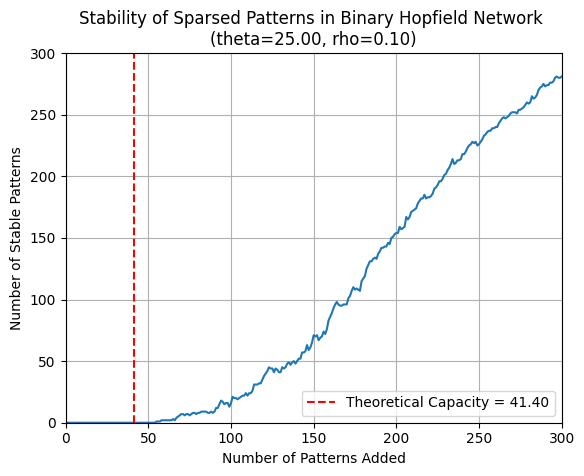

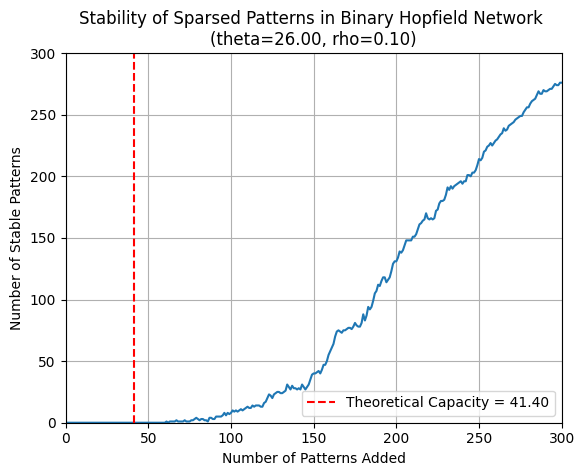

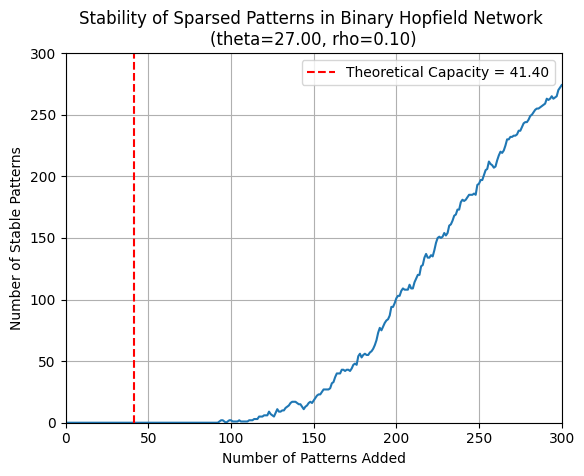

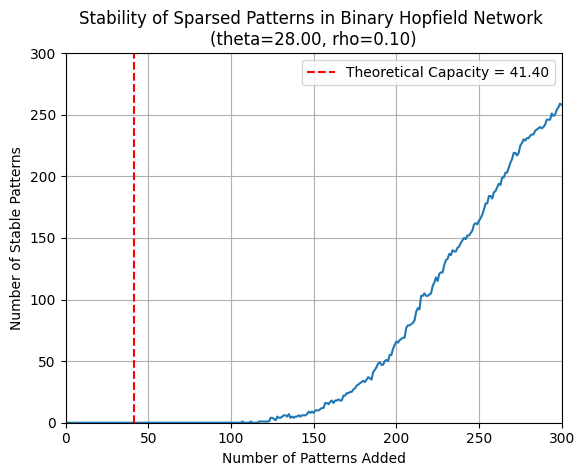

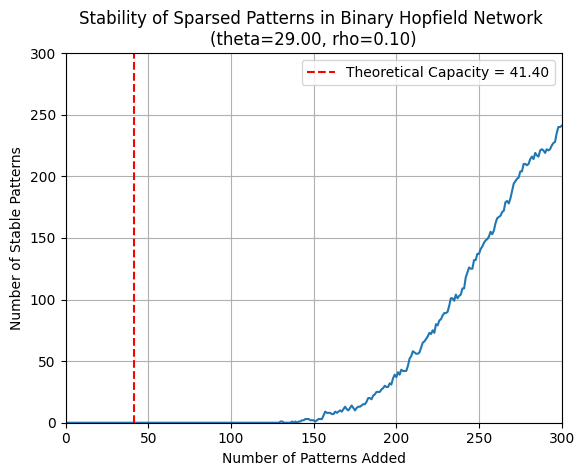

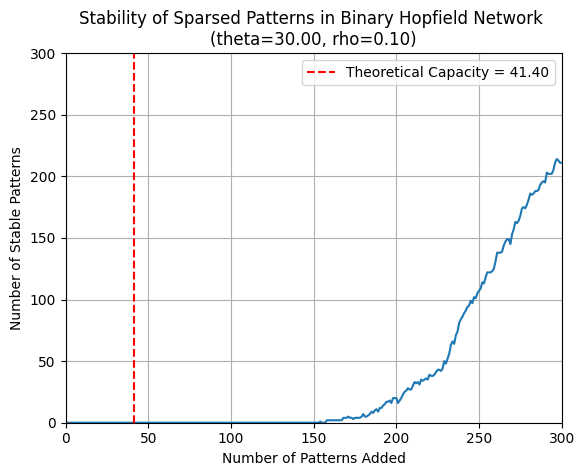

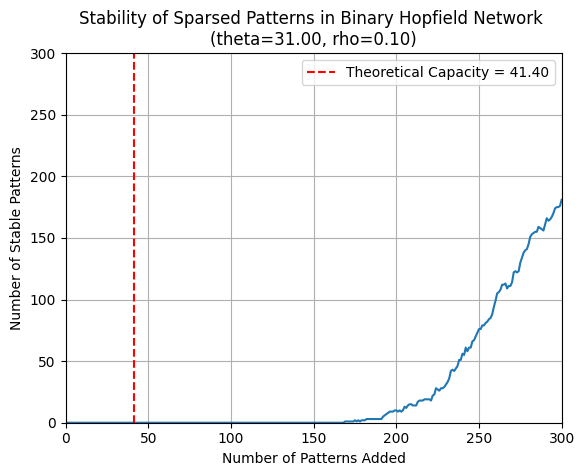

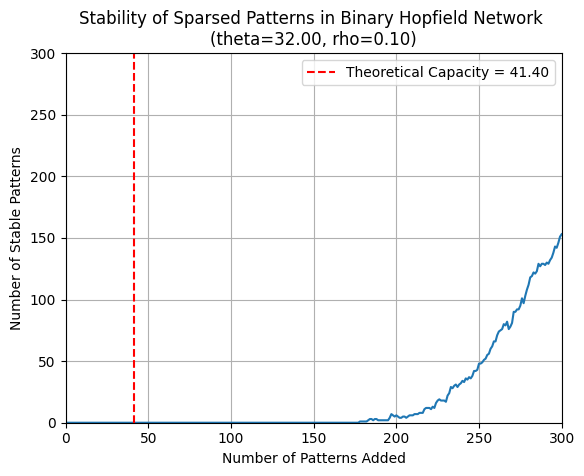

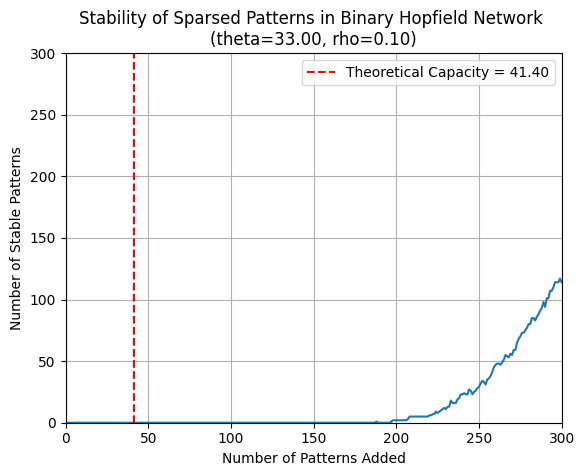

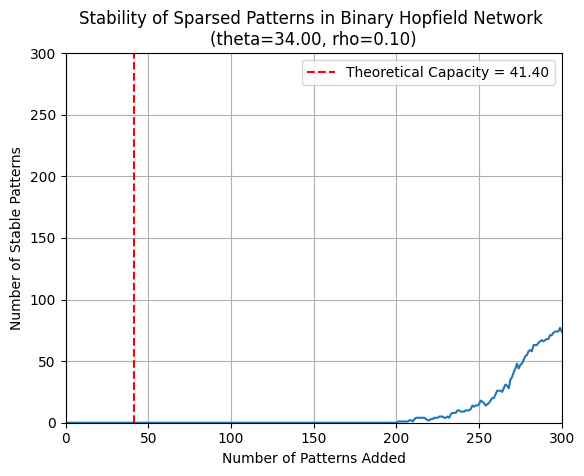

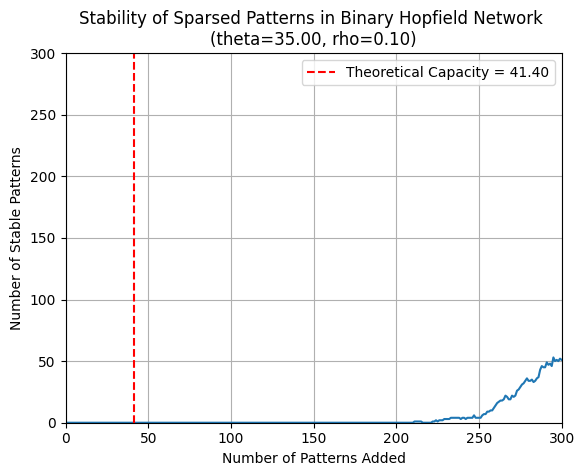

In [42]:
from tools import BinaryHopfieldNetwork, generate_sparse_patterns

num_patterns=300
network_size=300
average_activity=0.1
sparse_patterns = generate_sparse_patterns(
    num_patterns=num_patterns, 
    pattern_size=network_size, 
    average_activity=average_activity,
    seed=45
)

for theta in range(0, 36, 1):
    hn = BinaryHopfieldNetwork(theta=theta, n_nodes=network_size)
    stable_counts = hn.fit_incremental(sparse_patterns)
    capacity = 0.138 * network_size

    plt.plot(range(1, num_patterns + 1), stable_counts)
    plt.axvline(x=capacity, color='red', linestyle='--', label=f'Theoretical Capacity = {capacity:.2f}')

    plt.xlabel("Number of Patterns Added")
    plt.ylabel("Number of Stable Patterns")
    plt.ylim(0, num_patterns)
    plt.xlim(0, num_patterns)
    plt.title(f"Stability of Sparsed Patterns in Binary Hopfield Network \n(theta={theta:.2f}, rho={average_activity:.2f})")
    plt.grid(True)
    plt.legend()

    plt.savefig(f"3.6_Sparse_{average_activity:.2f}_rho_{theta:.2f}_theta.png")
    plt.show()

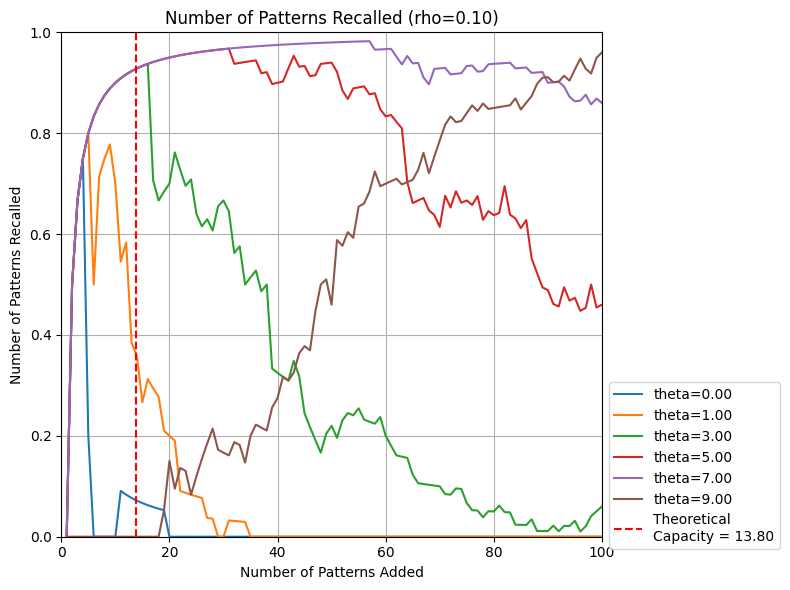

In [175]:
num_patterns=100
network_size=100
average_activity=0.1
sparse_patterns = generate_sparse_patterns(
    num_patterns=num_patterns, 
    pattern_size=network_size, 
    average_activity=average_activity,
    seed=45
)

accuracy_history = {}
list_theta = [0, 1, 3, 5, 7]
for theta in list_theta: 
    _list_accuracy = []
    for j in range(network_size):
        _patterns = sparse_patterns[:j]
        hn = BinaryHopfieldNetwork(theta=theta, n_nodes=network_size)
        hn.fit(_patterns)
        _preds = hn.recall(_patterns)
        _list_accuracy.append(
            sum(hn.evaluate(patterns_pred=_preds, patterns=_patterns)) / (j+1)
        )
    accuracy_history[theta] = _list_accuracy

plt.figure(figsize=(8,6))

for theta in list_theta:
    plt.plot(range(1, num_patterns+ 1), accuracy_history[theta], label=f'theta={theta:.2f}')
plt.axvline(x=0.138*num_patterns, color='red', linestyle='--', label=f'Theoretical \nCapacity = {0.138*num_patterns:.2f}')

plt.xlabel("Number of Patterns Added")
plt.ylabel("Number of Patterns Recalled")
plt.xlim(0, num_patterns)
plt.ylim(0, 1)
plt.title(f"Number of Patterns Recalled (rho={average_activity:.2f})")
plt.grid(True)

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.32))
plt.tight_layout()
plt.show()

### What about even sparser patterns (ρ = 0.05 or 0.01)?

#### $\rho$ = 0.05

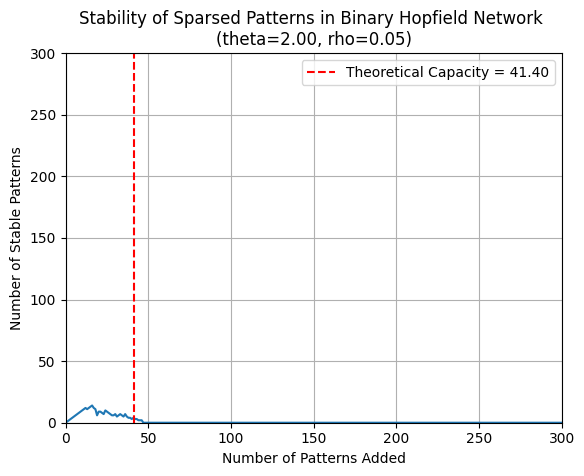

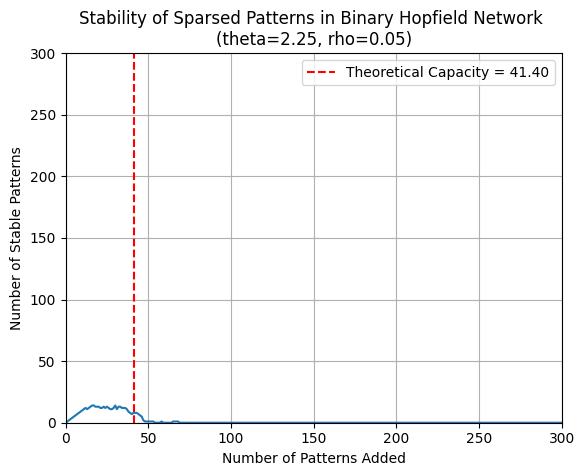

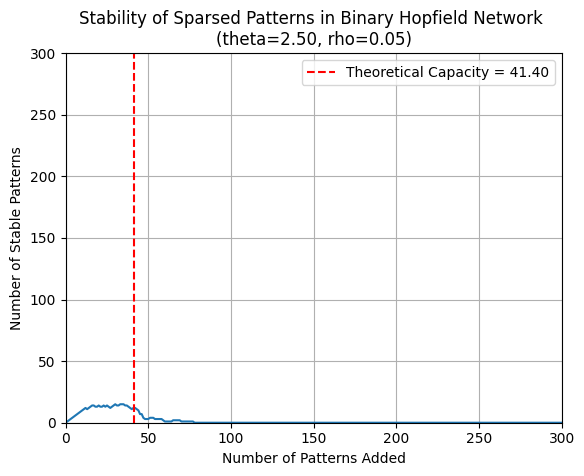

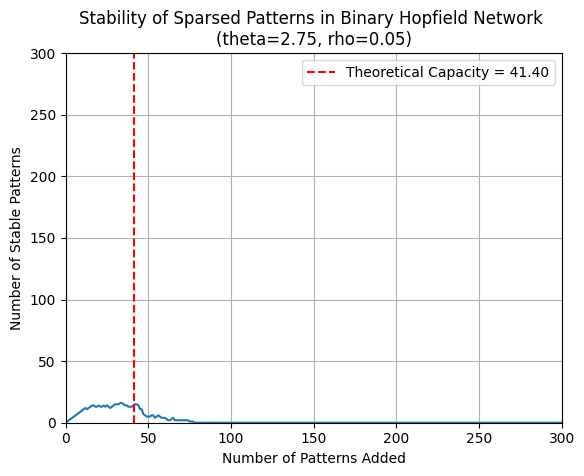

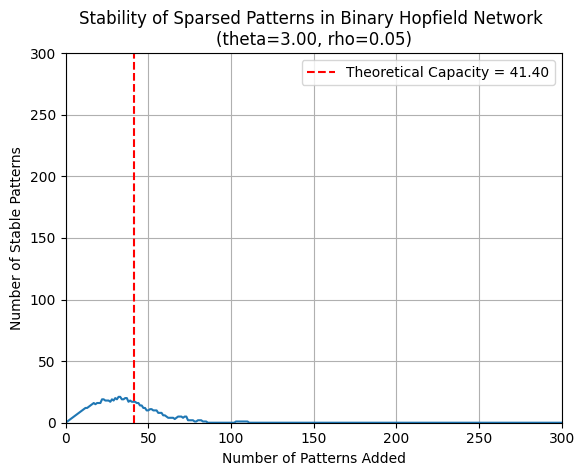

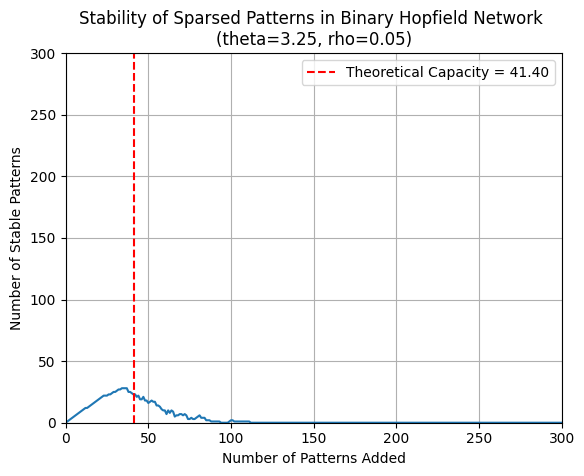

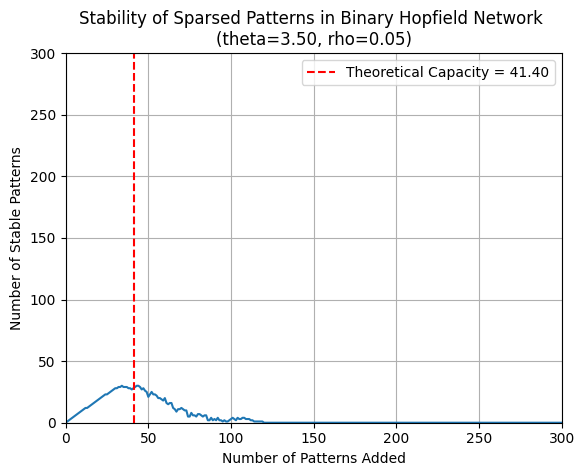

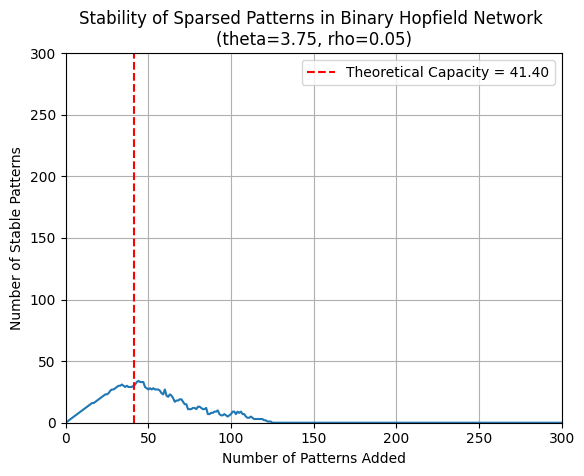

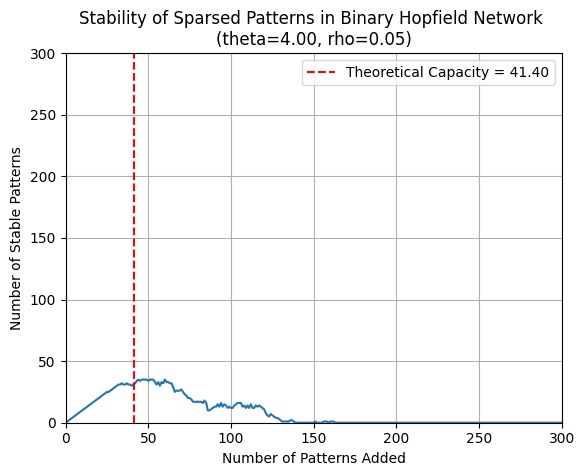

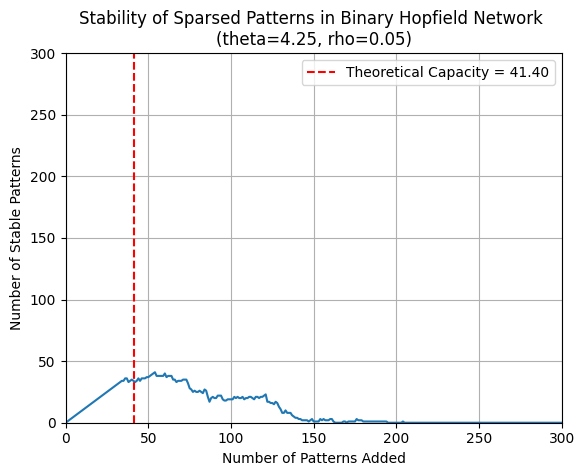

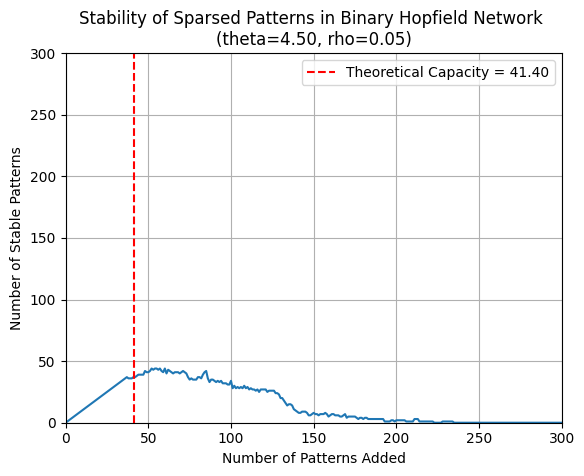

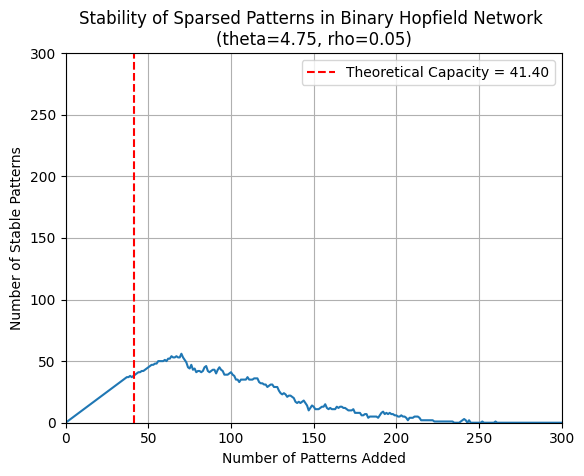

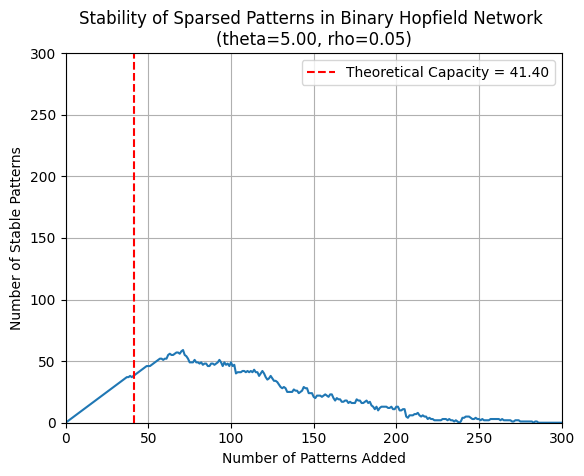

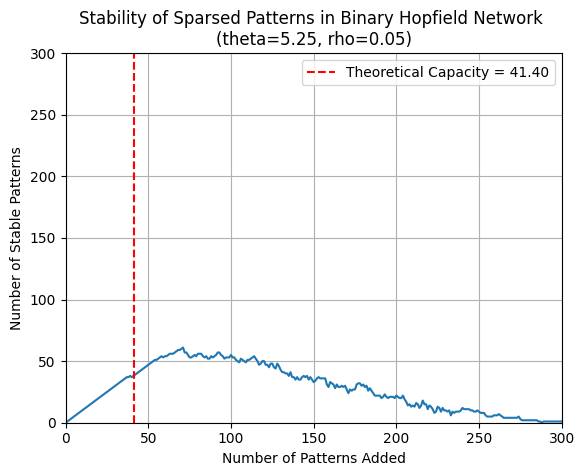

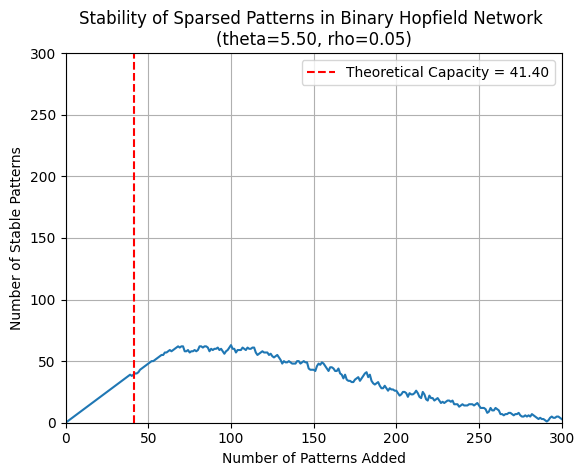

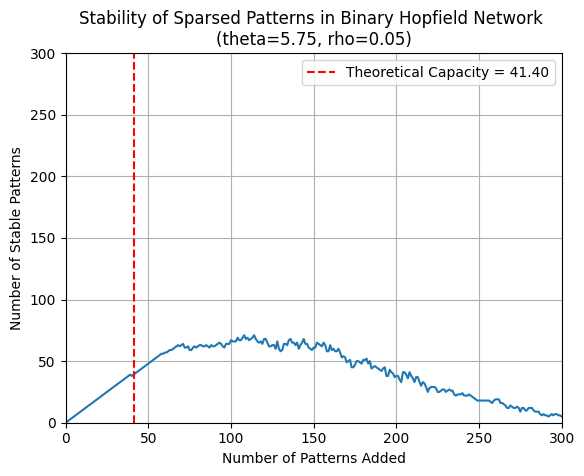

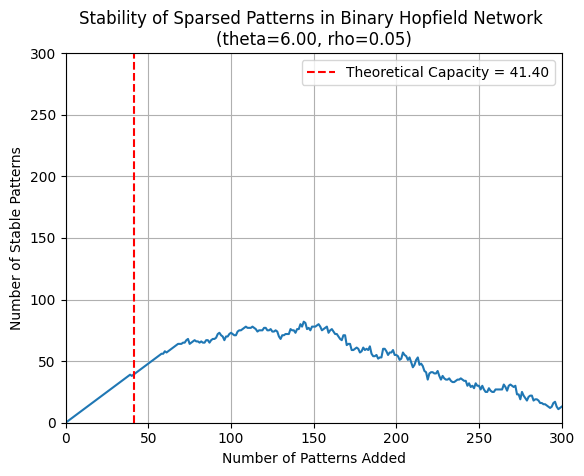

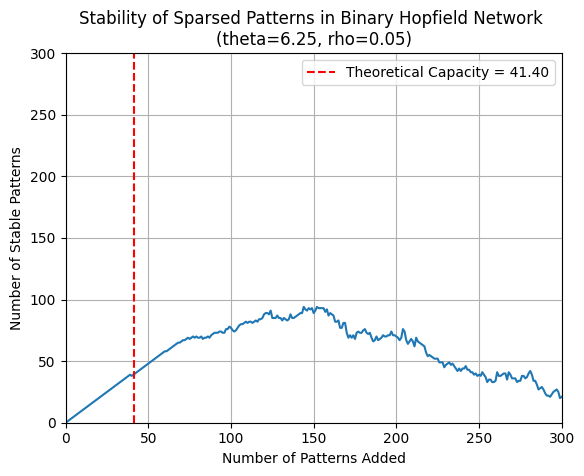

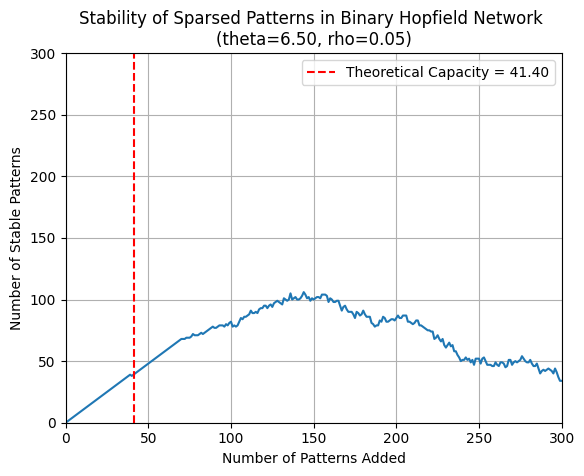

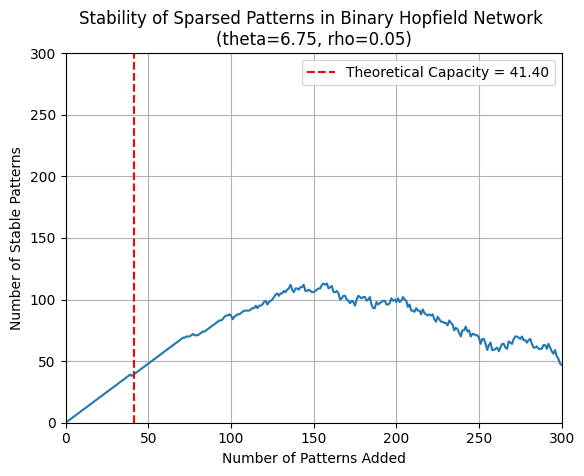

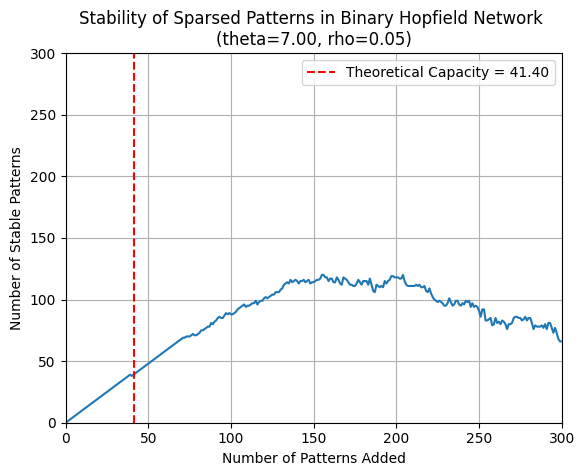

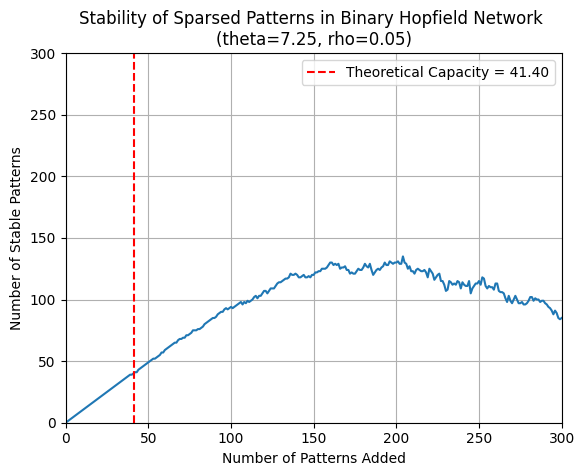

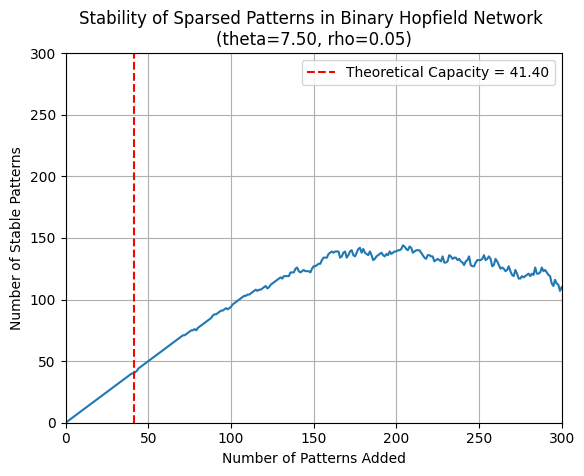

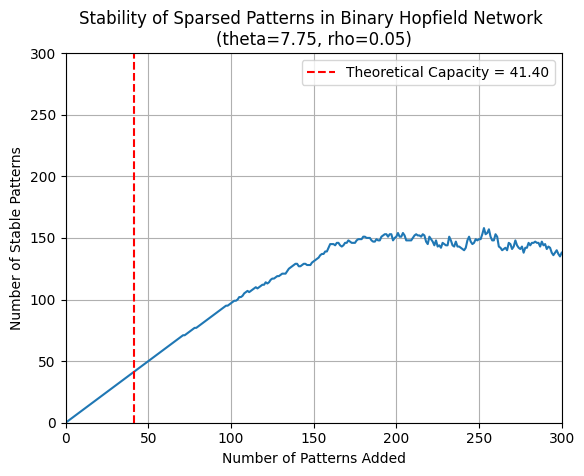

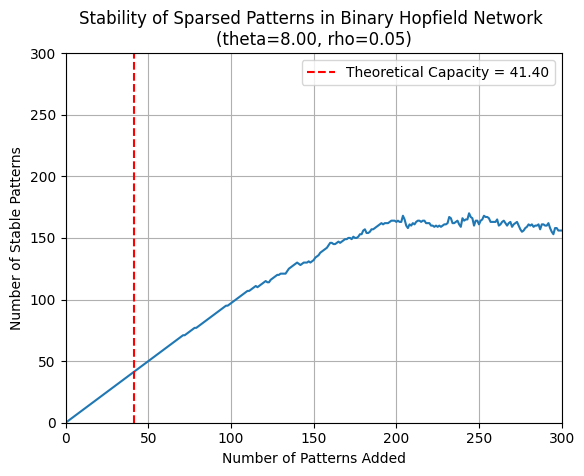

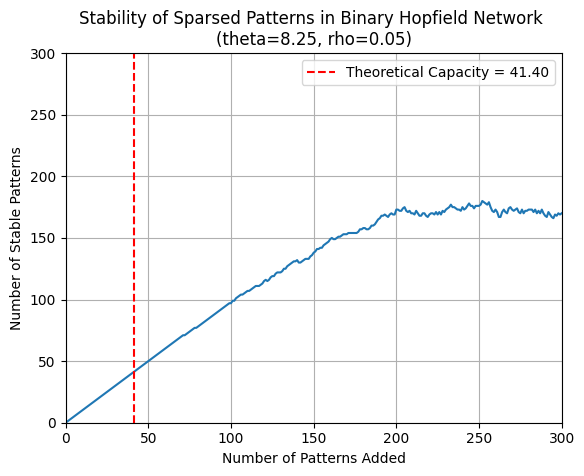

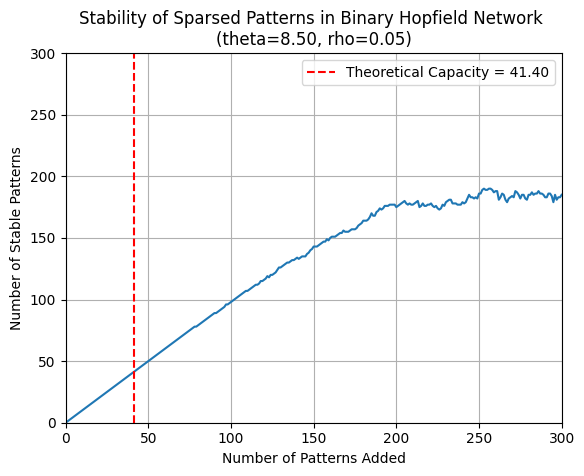

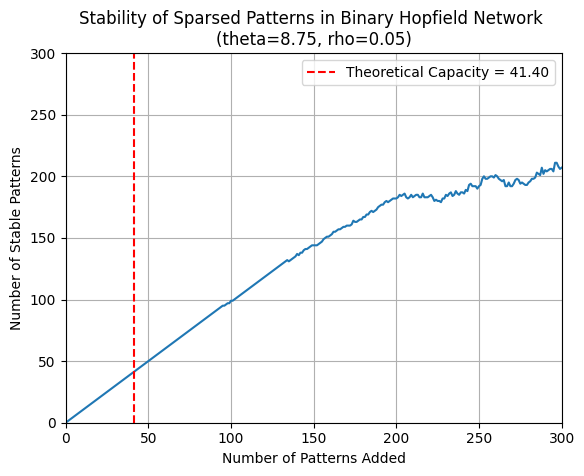

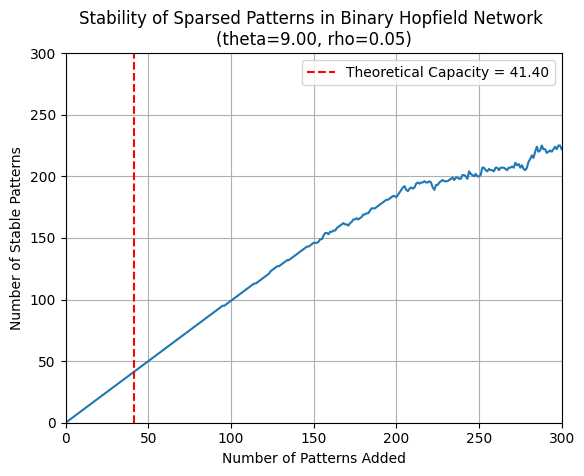

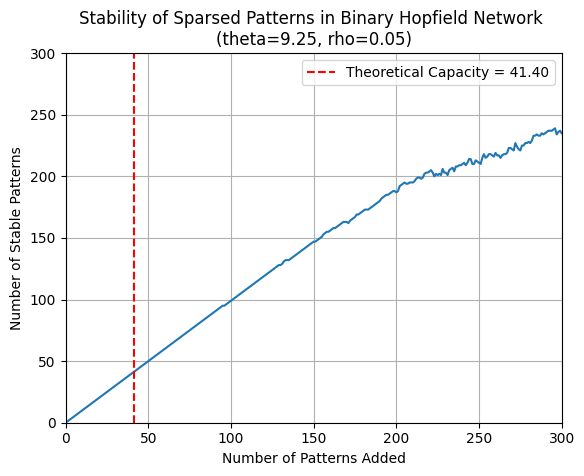

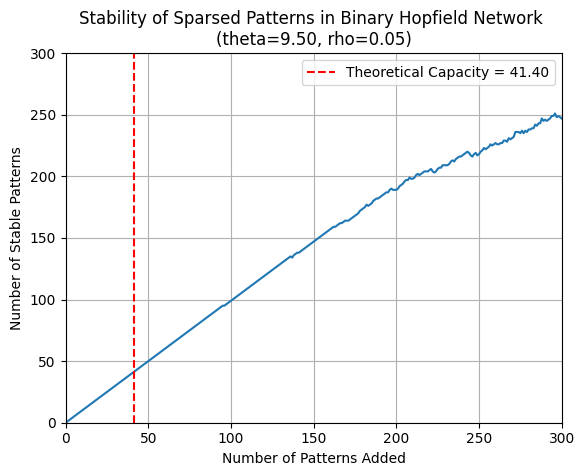

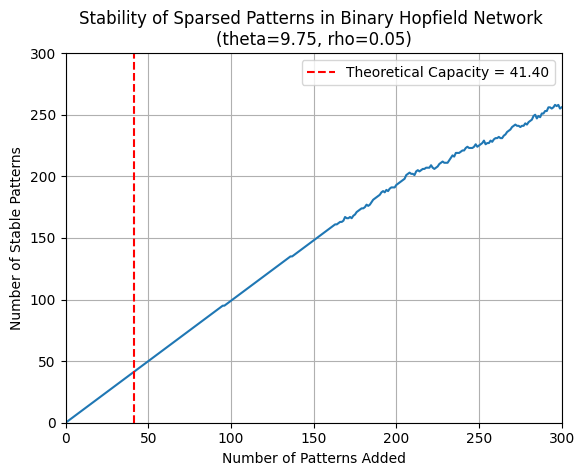

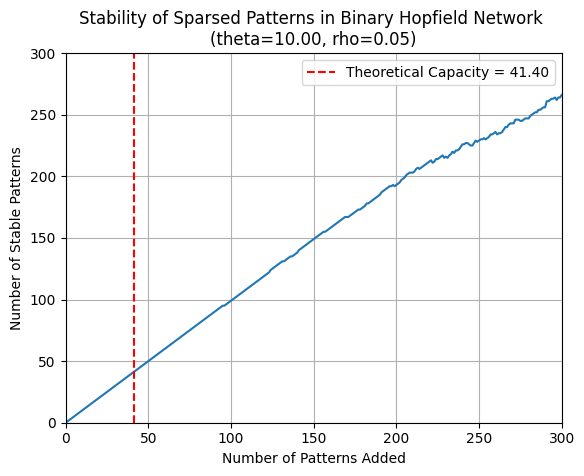

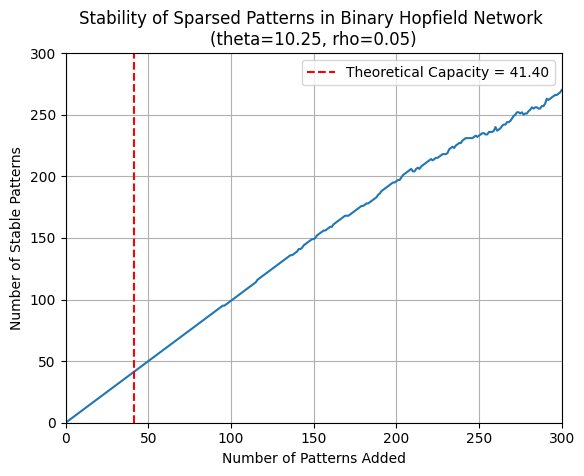

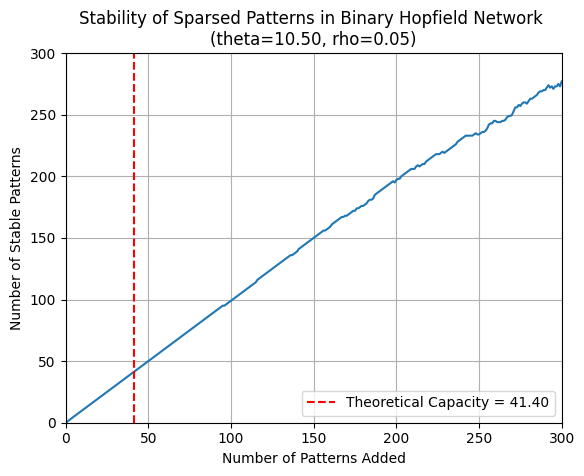

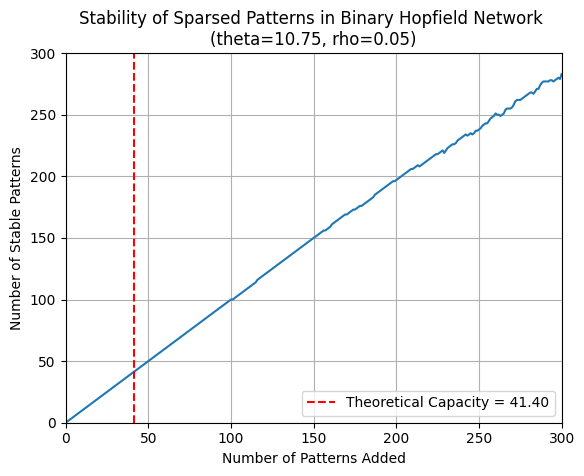

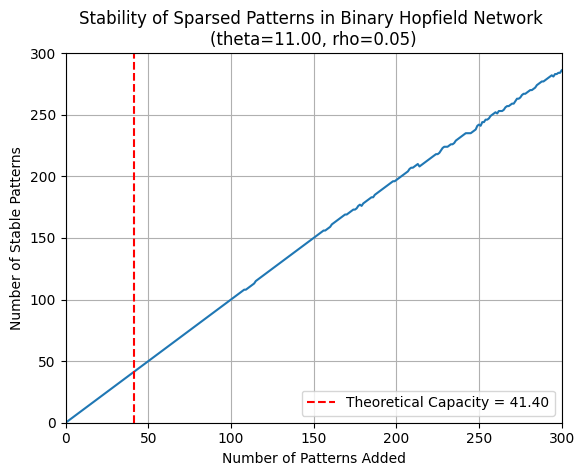

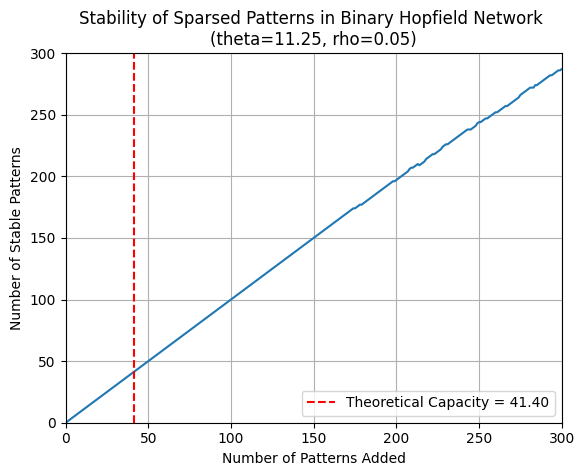

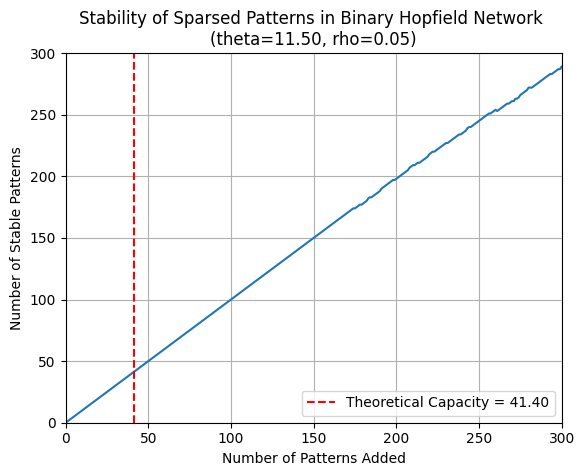

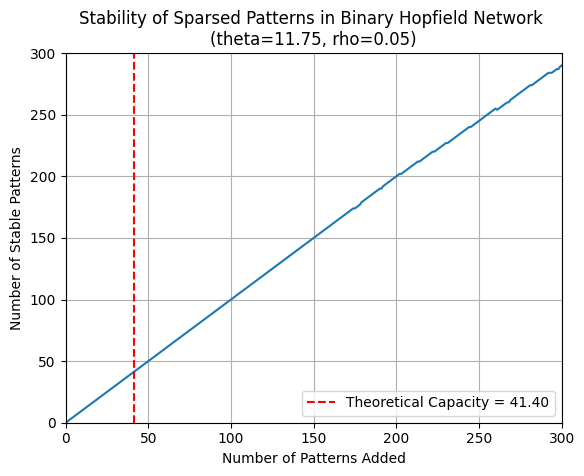

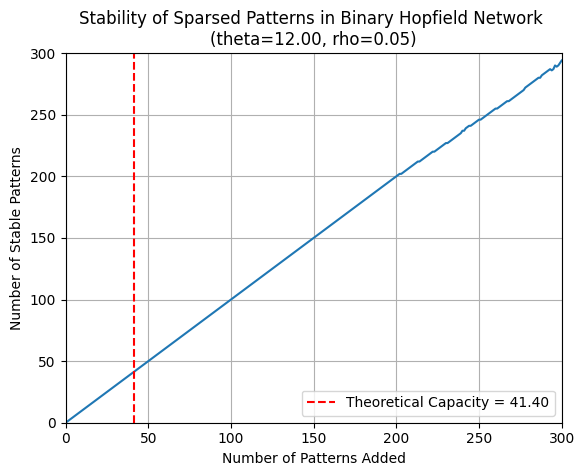

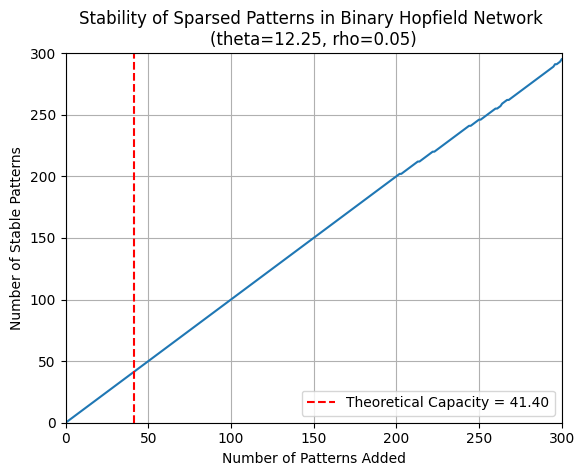

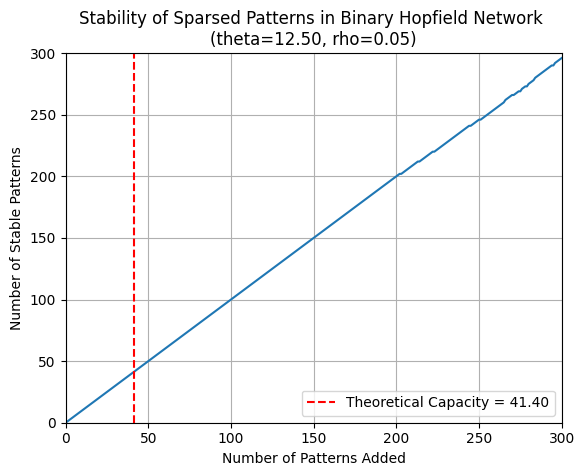

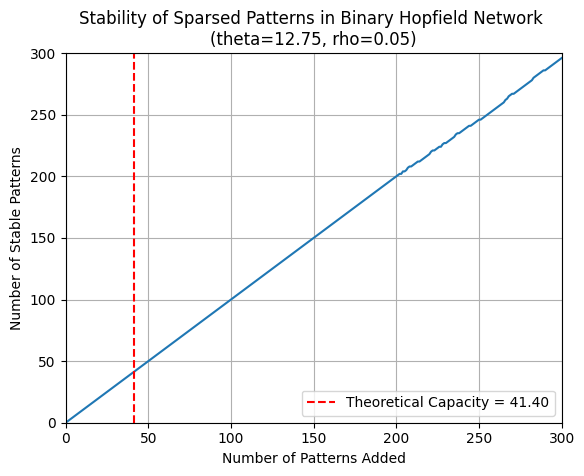

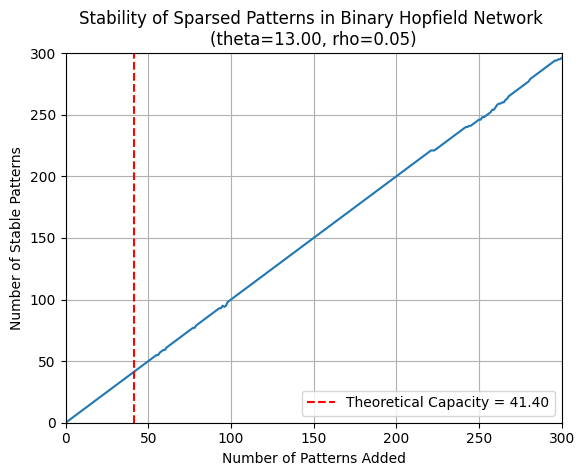

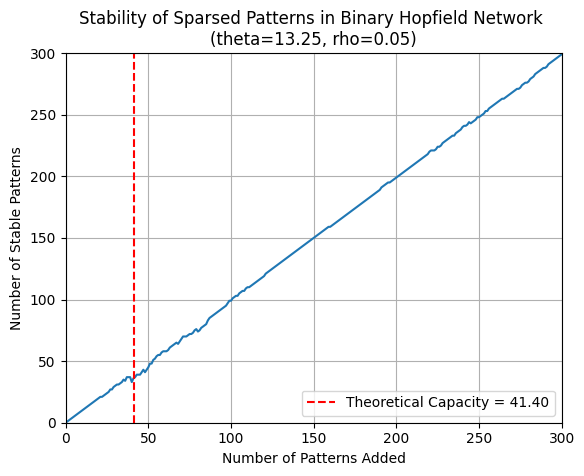

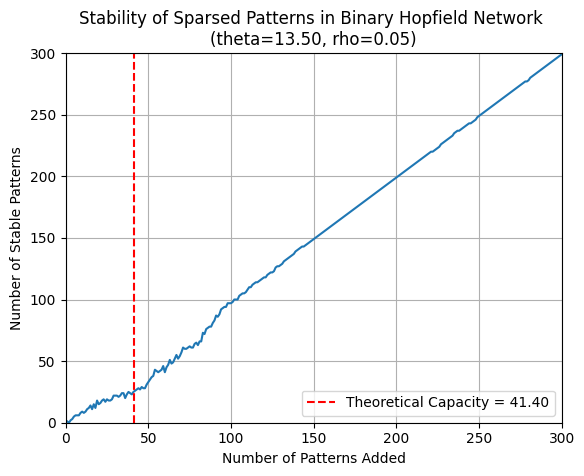

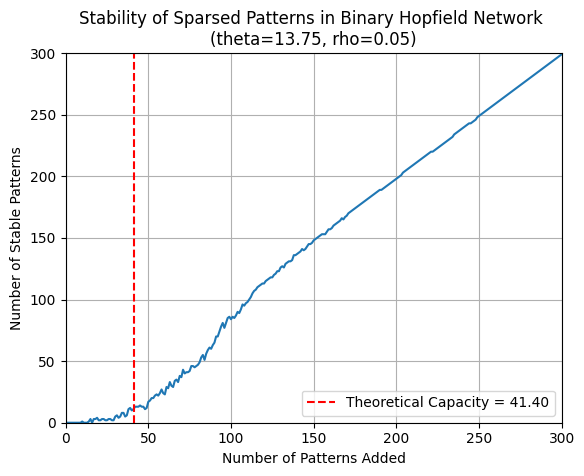

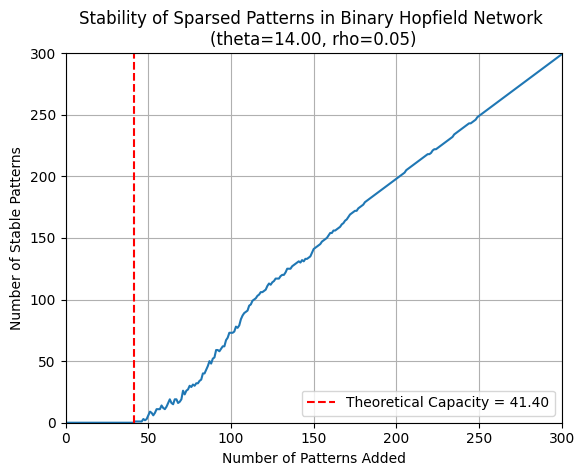

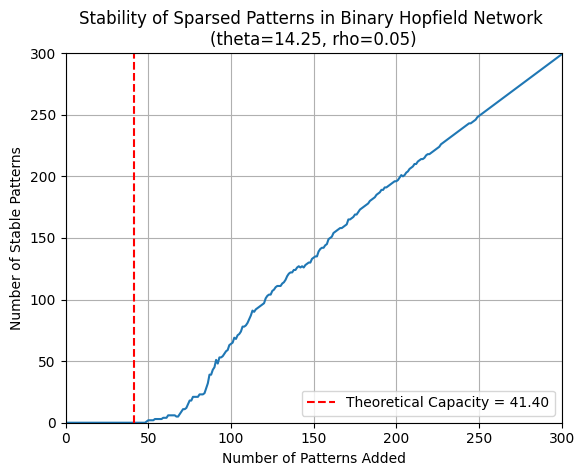

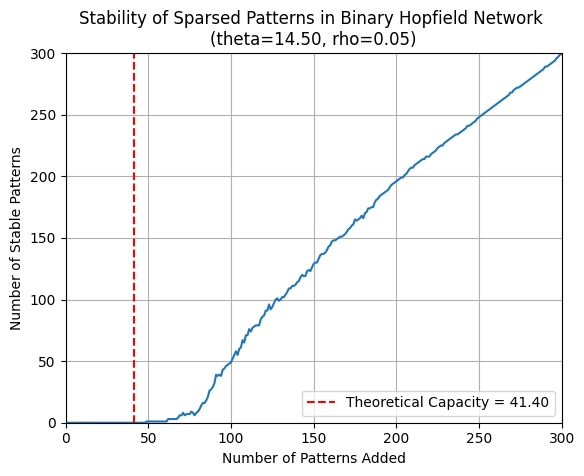

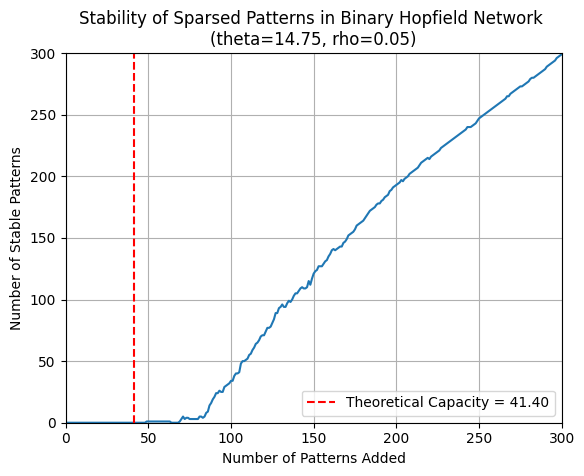

In [39]:
num_patterns=300
network_size=300
average_activity=0.05
sparse_patterns = generate_sparse_patterns(
    num_patterns=num_patterns, 
    pattern_size=network_size, 
    average_activity=average_activity,
    seed=45
)

for i in range(200, 1500, 25):  
    theta = i/100
    hn = BinaryHopfieldNetwork(theta=theta, n_nodes=network_size)
    stable_counts = hn.fit_incremental(sparse_patterns)
    capacity = 0.138 * network_size

    plt.plot(range(1, num_patterns + 1), stable_counts)
    plt.axvline(x=capacity, color='red', linestyle='--', label=f'Theoretical Capacity = {capacity:.2f}')

    plt.xlabel("Number of Patterns Added")
    plt.ylabel("Number of Stable Patterns")
    plt.ylim(0, num_patterns)
    plt.xlim(0, num_patterns)
    plt.title(f"Stability of Sparsed Patterns in Binary Hopfield Network \n(theta={theta:.2f}, rho={average_activity:.2f})")
    plt.grid(True)
    plt.legend()

    plt.savefig(f"3.6_Sparse_{average_activity:.2f}_rho_{theta:.2f}_theta.png")
    plt.show()

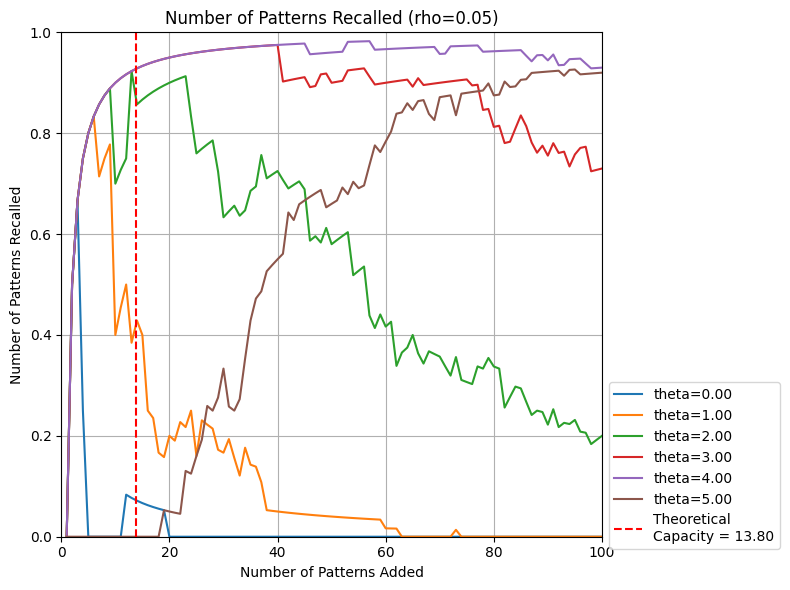

In [ ]:
num_patterns=100
network_size=100
average_activity=0.05
sparse_patterns = generate_sparse_patterns(
    num_patterns=num_patterns, 
    pattern_size=network_size, 
    average_activity=average_activity,
    seed=45
)

accuracy_history = {}
list_theta = [0, 1, 2, 3, 4, 5]
for theta in list_theta: 
    _list_accuracy = []
    for j in range(network_size):
        _patterns = sparse_patterns[:j]
        hn = BinaryHopfieldNetwork(theta=theta, n_nodes=network_size)
        hn.fit(_patterns)
        _preds = hn.recall(_patterns)
        _list_accuracy.append(
            sum(hn.evaluate(patterns_pred=_preds, patterns=_patterns)) / (j+1)
        )
    accuracy_history[theta] = _list_accuracy

plt.figure(figsize=(8,6))

for theta in list_theta:
    plt.plot(range(1, num_patterns+ 1), accuracy_history[theta], label=f'theta={theta:.2f}')
plt.axvline(x=0.138*num_patterns, color='red', linestyle='--', label=f'Theoretical \nCapacity = {0.138*num_patterns:.2f}')

plt.xlabel("Number of Patterns Added")
plt.ylabel("Number of Patterns Recalled")
plt.xlim(0, num_patterns)
plt.ylim(0, 1)
plt.title(f"Number of Patterns Recalled (rho={average_activity:.2f})")
plt.grid(True)

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.35))
plt.tight_layout()
plt.show()

#### $\rho$ = 0.01

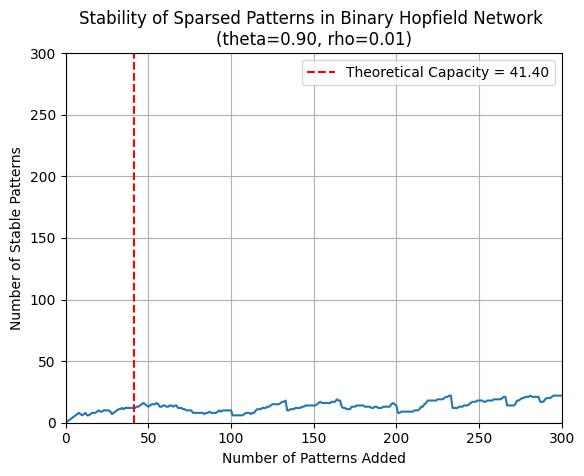

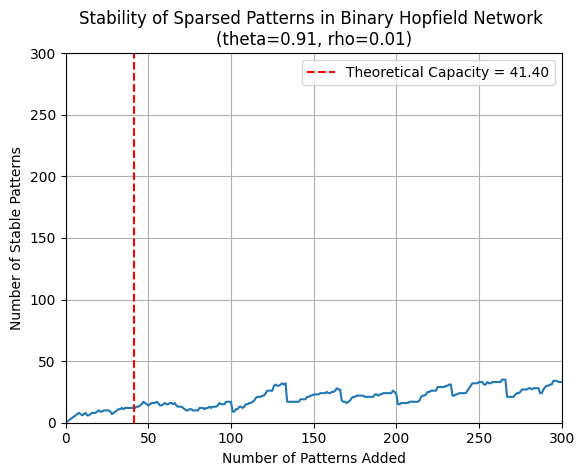

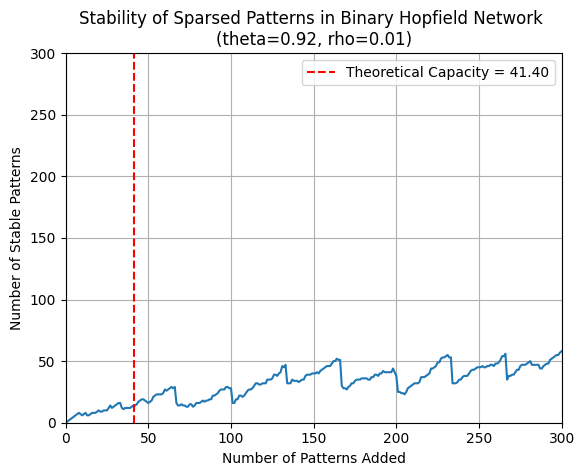

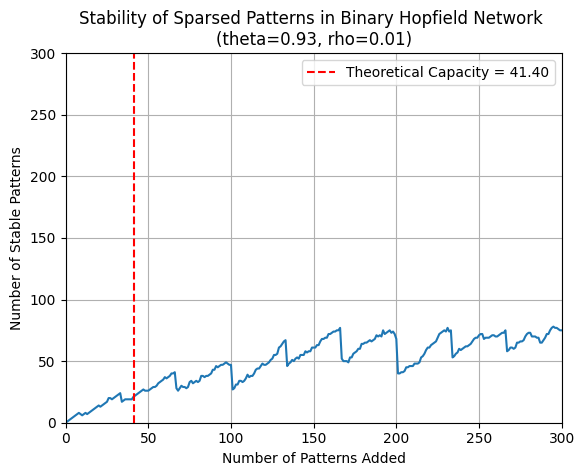

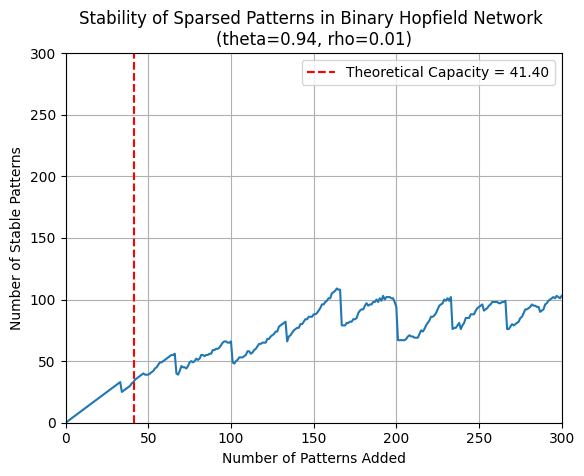

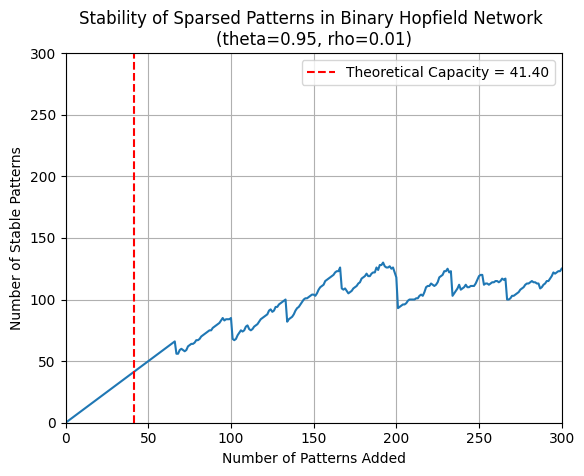

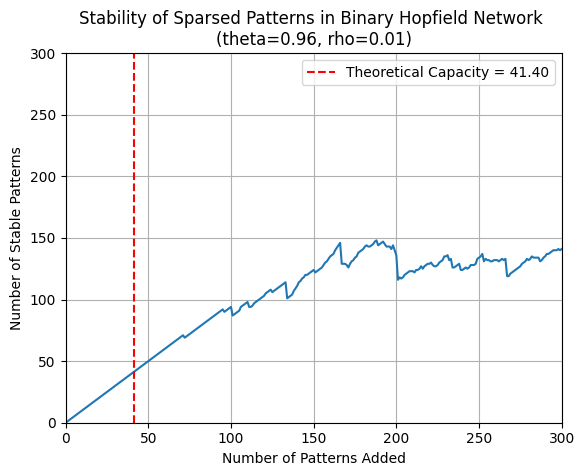

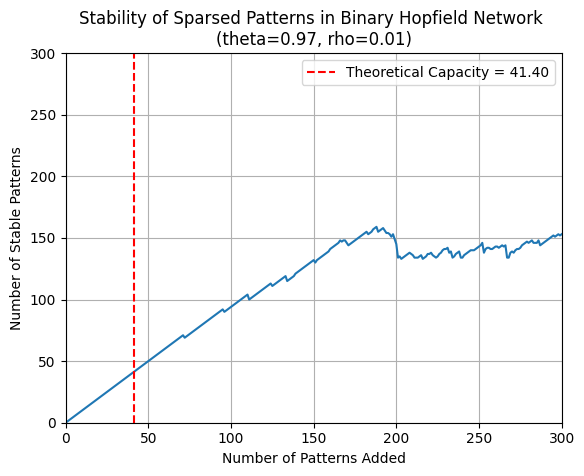

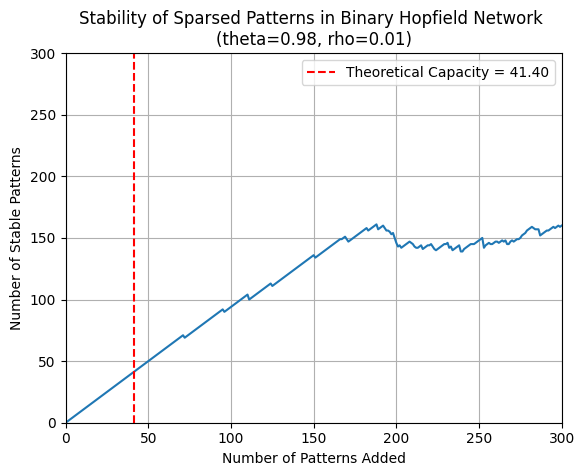

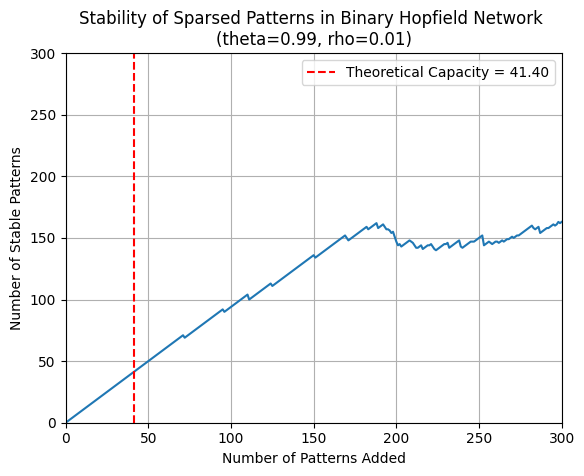

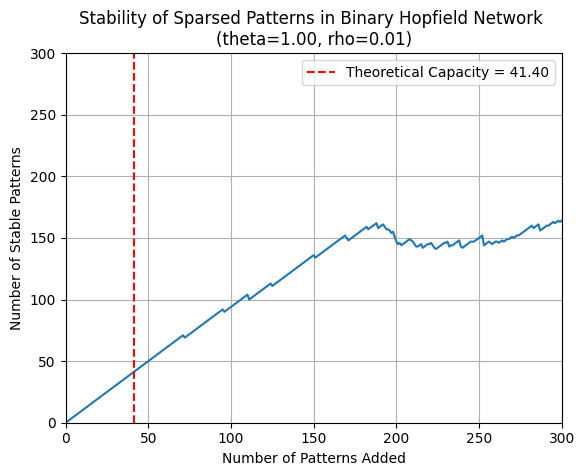

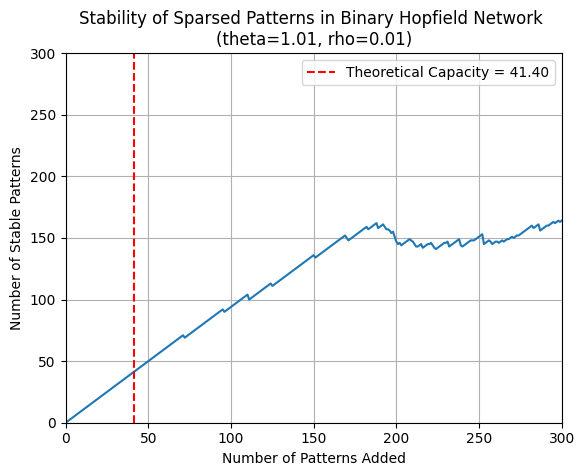

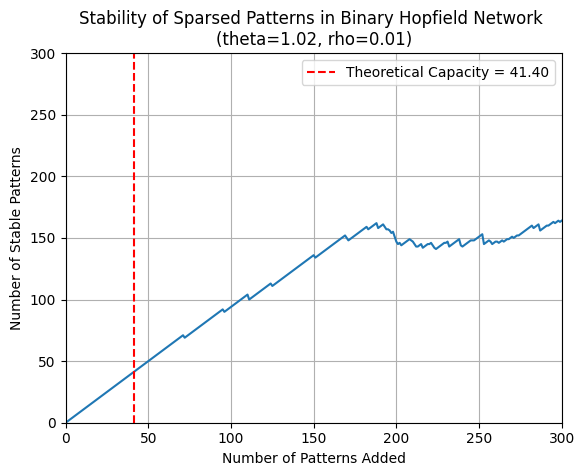

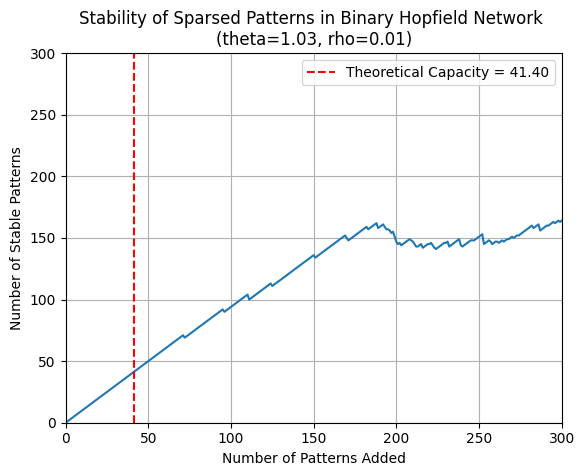

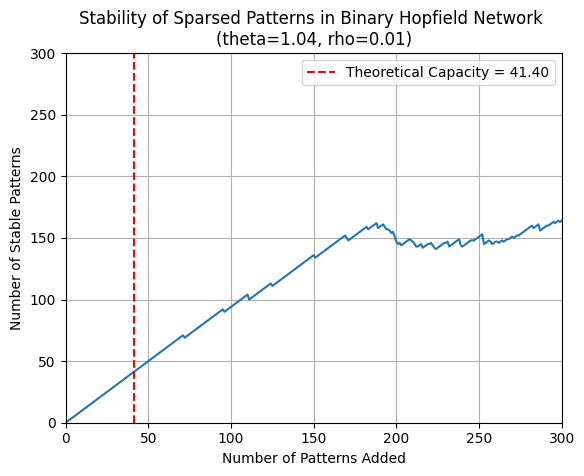

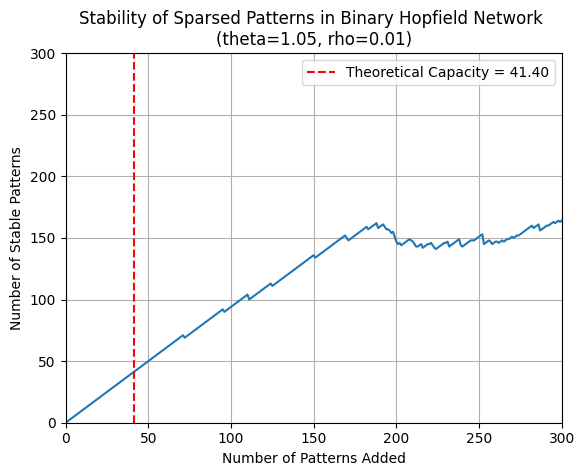

In [35]:
num_patterns=300
network_size=300
average_activity=0.01
sparse_patterns = generate_sparse_patterns(
    num_patterns=num_patterns, 
    pattern_size=network_size, 
    average_activity=average_activity,
    seed=45
)

for i in range(90, 106, 1):
    theta = i/100
    hn = BinaryHopfieldNetwork(theta=theta, n_nodes=network_size)
    stable_counts = hn.fit_incremental(sparse_patterns)
    capacity = 0.138 * network_size

    plt.plot(range(1, num_patterns + 1), stable_counts)
    plt.axvline(x=capacity, color='red', linestyle='--', label=f'Theoretical Capacity = {capacity:.2f}')

    plt.xlabel("Number of Patterns Added")
    plt.ylabel("Number of Stable Patterns")
    plt.ylim(0, num_patterns)
    plt.xlim(0, num_patterns)
    plt.title(f"Stability of Sparsed Patterns in Binary Hopfield Network \n(theta={theta:.2f}, rho={average_activity:.2f})")
    plt.grid(True)
    plt.legend()

    plt.savefig(f"3.6_Sparse_{average_activity:.2f}_rho_{theta:.2f}_theta.png")
    plt.show()

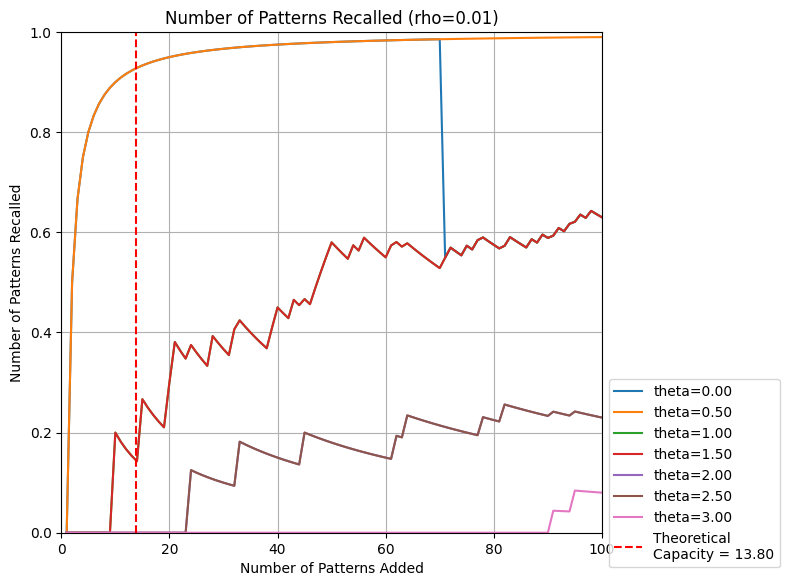

In [ ]:
num_patterns=100
network_size=100
average_activity=0.01
sparse_patterns = generate_sparse_patterns(
    num_patterns=num_patterns, 
    pattern_size=network_size, 
    average_activity=average_activity,
    seed=45
)

accuracy_history = {}
list_theta = [0, 0.5, 1, 1.5, 2, 2.5, 3]
for theta in list_theta:
    _list_accuracy = []
    for j in range(network_size):
        _patterns = sparse_patterns[:j]
        hn = BinaryHopfieldNetwork(theta=theta, n_nodes=network_size)
        hn.fit(_patterns)
        _preds = hn.recall(_patterns)
        _list_accuracy.append(
            sum(hn.evaluate(patterns_pred=_preds, patterns=_patterns)) / (j+1)
        )
    accuracy_history[theta] = _list_accuracy

plt.figure(figsize=(8,6))

for theta in list_theta:
    plt.plot(range(1, num_patterns+ 1), accuracy_history[theta], label=f'theta={theta:.2f}')
plt.axvline(x=0.138*num_patterns, color='red', linestyle='--', label=f'Theoretical \nCapacity = {0.138*num_patterns:.2f}')

plt.xlabel("Number of Patterns Added")
plt.ylabel("Number of Patterns Recalled")
plt.xlim(0, num_patterns)
plt.ylim(0, 1)
plt.title(f"Number of Patterns Recalled (rho={average_activity:.2f})")
plt.grid(True)

plt.legend(loc='upper left', bbox_to_anchor=(1, 0.39))
plt.tight_layout()
plt.show()